In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import h5py
import scipy.io

plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"

# Results for -100 to 100 nm

In [2]:
highest_coeff = 15
M = highest_coeff-1
N = 400
lam = 632

with h5py.File('test_output_vortex_C4_individual.mat', 'r') as f:
    print(f.keys())
    truth948nm = f["test_output"]
    print(truth948nm.shape)
    truthVec = truth948nm[:N,0]*10
d = scipy.io.loadmat('rec_test_vortex_C4_individual.mat')
rec948nm = d['rec_test']*10
print(rec948nm[:10,0])
print(truthVec[:10])

<KeysViewHDF5 ['test_output']>
(5600, 14)
[-514.33704 -516.43317 -514.1398  -507.51022 -502.90997 -499.23917
 -495.72217 -496.5064  -494.2784  -497.10834]
[-948.         -943.2481203  -938.4962406  -933.7443609  -928.9924812
 -924.2406015  -919.4887218  -914.73684211 -909.98496241 -905.23308271]


<IPython.core.display.Javascript object>


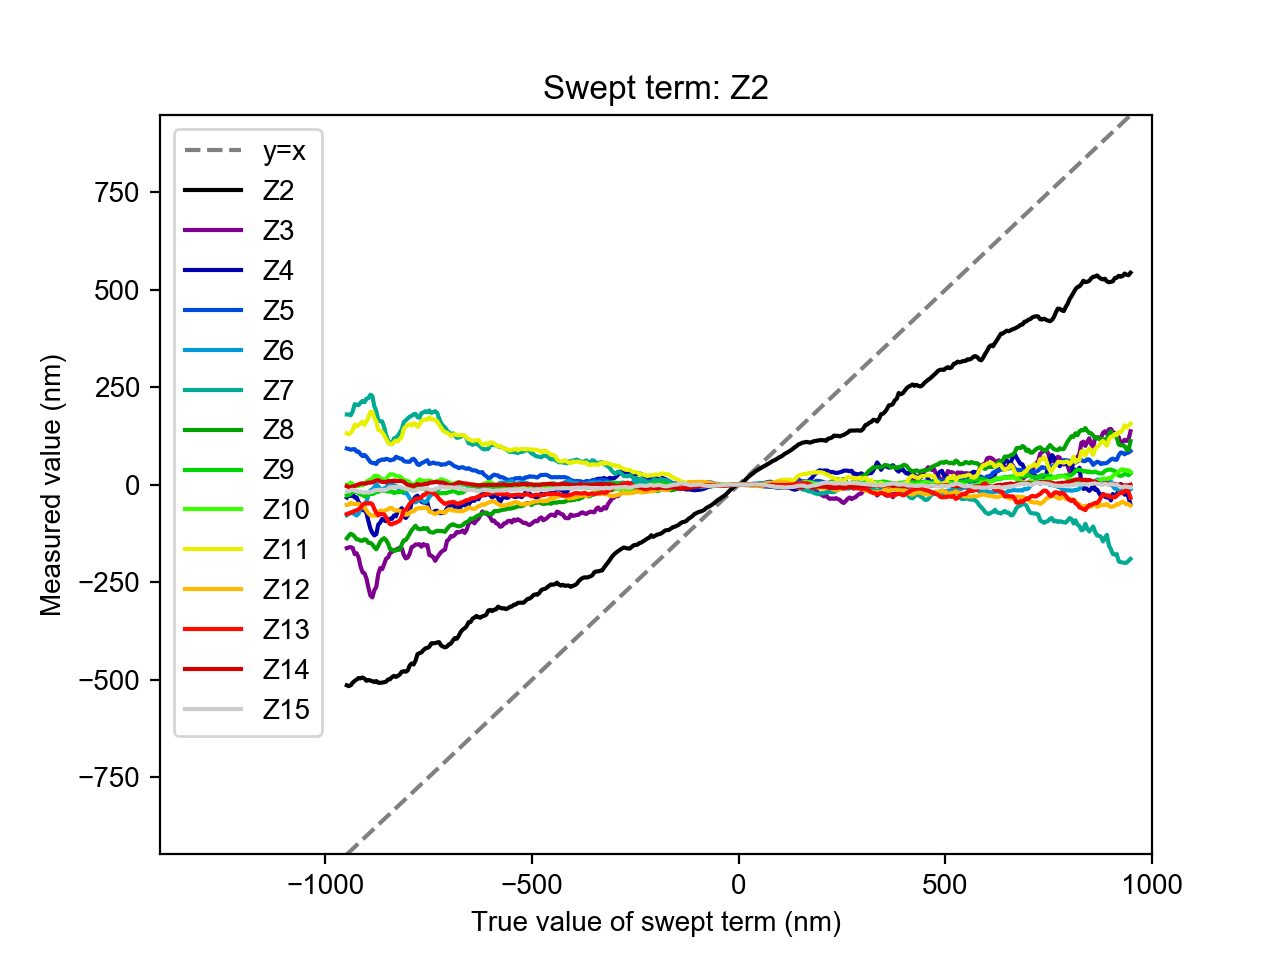

<IPython.core.display.Javascript object>


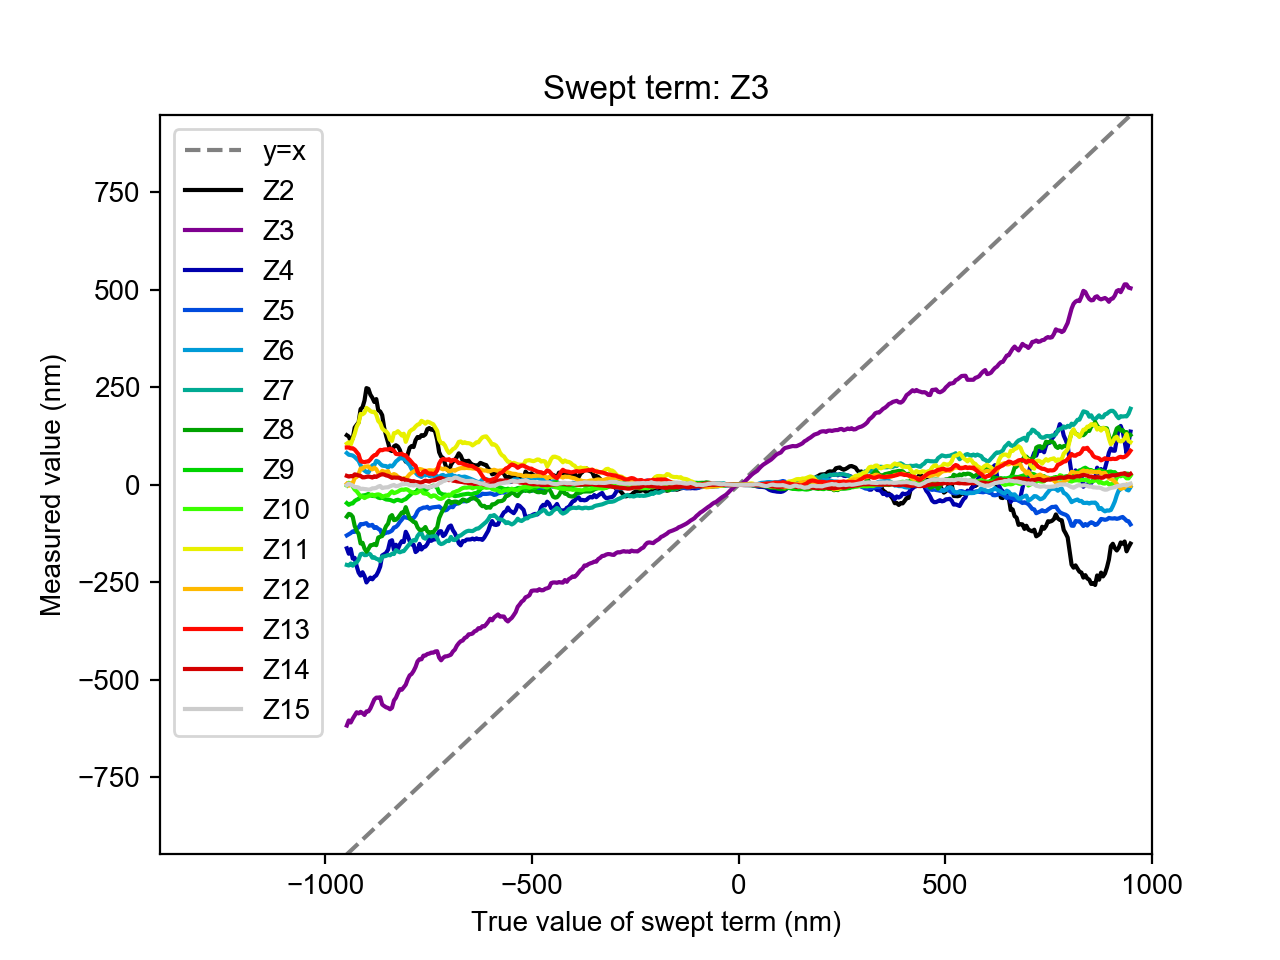

<IPython.core.display.Javascript object>


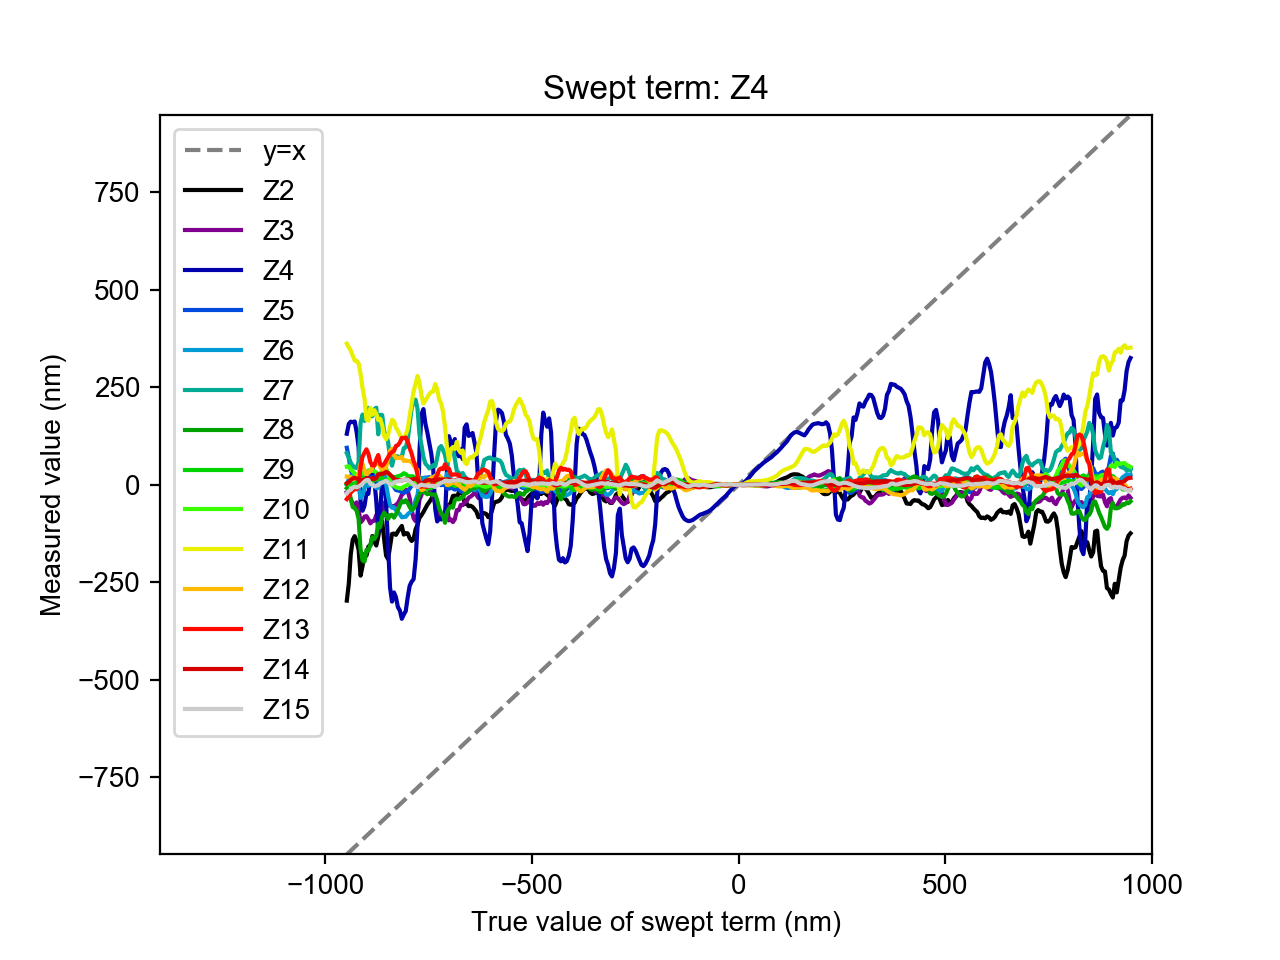

<IPython.core.display.Javascript object>


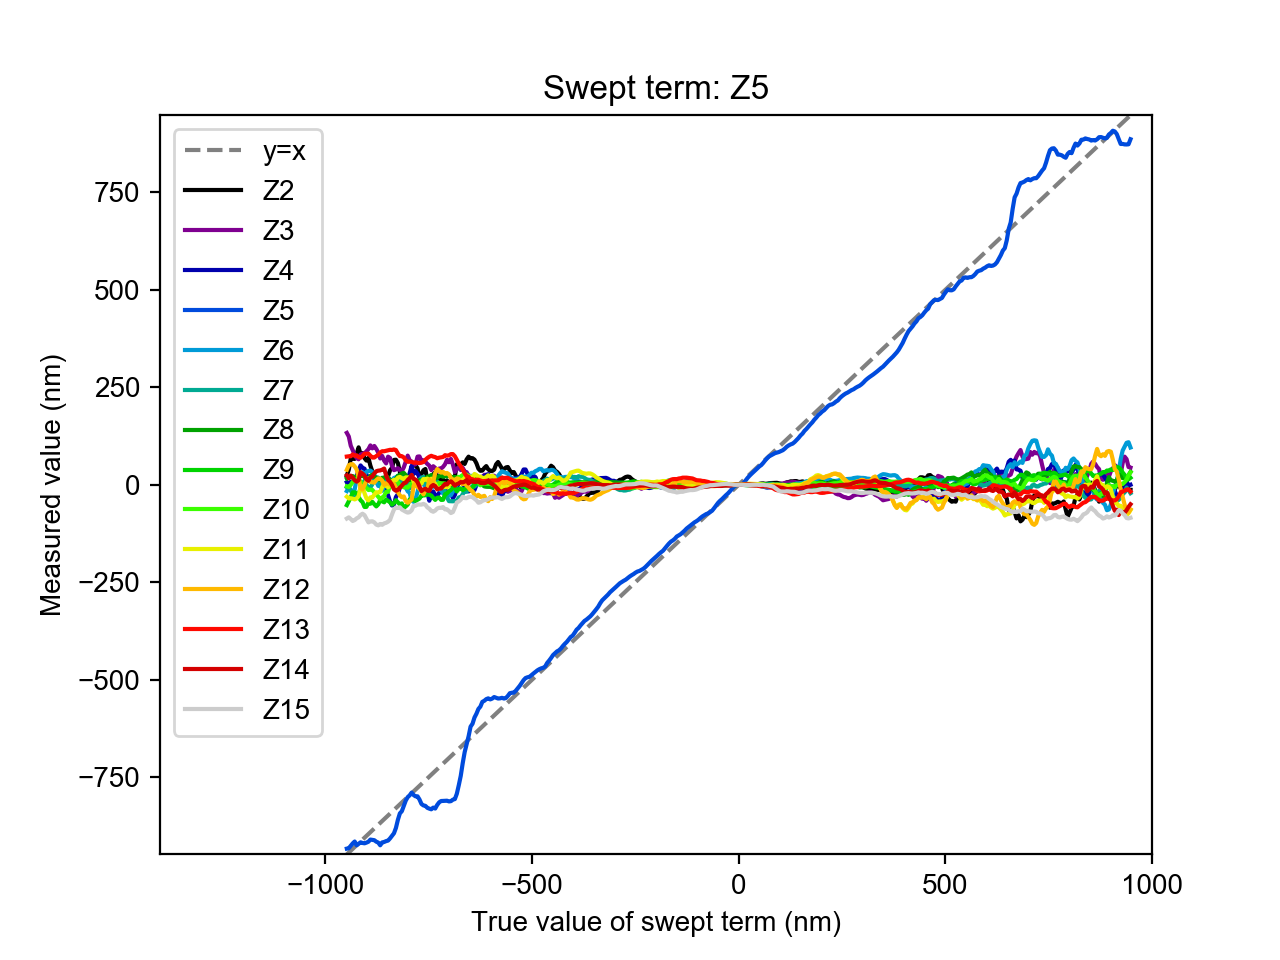

<IPython.core.display.Javascript object>


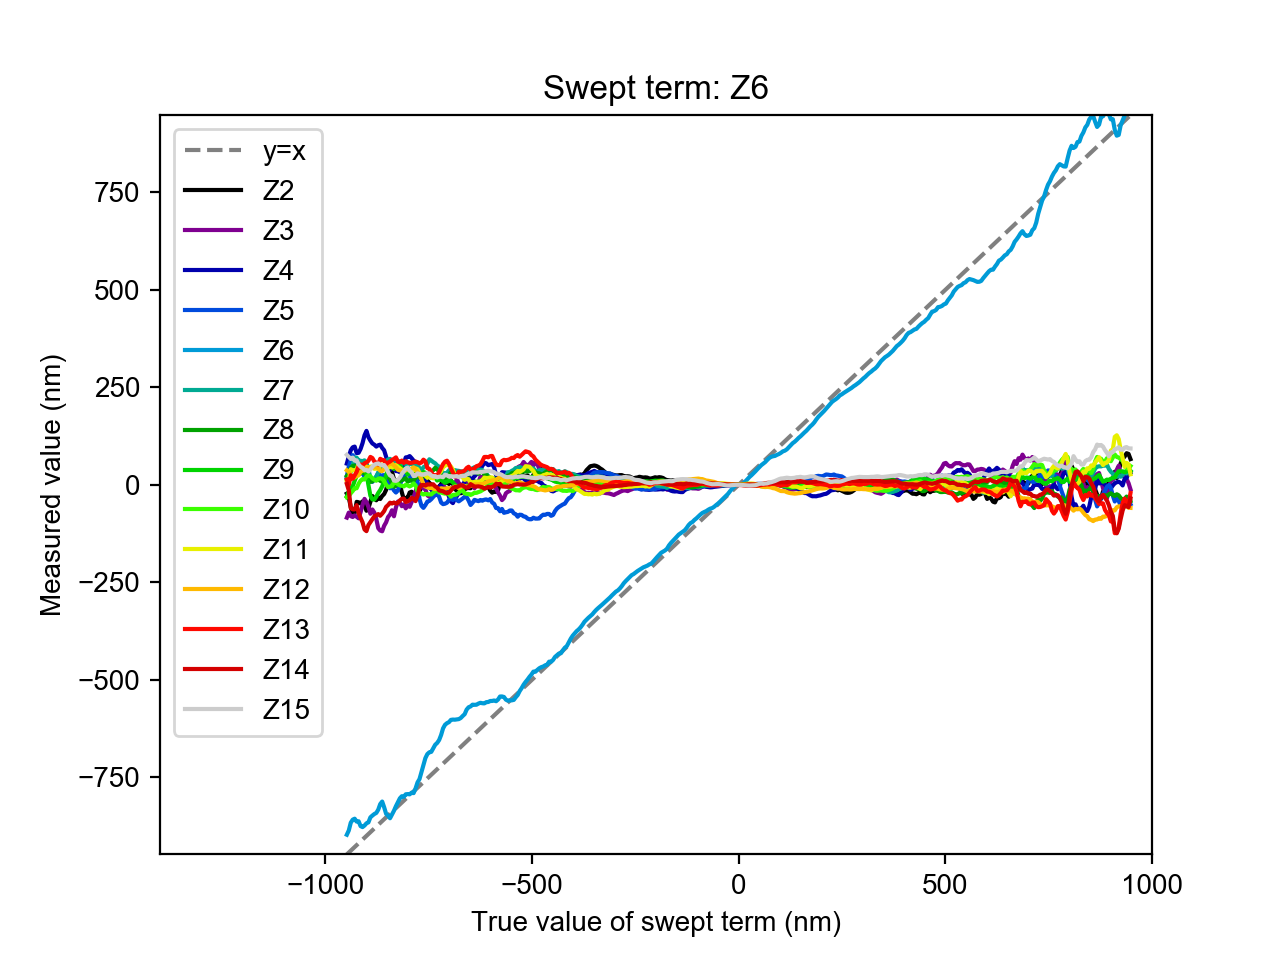

<IPython.core.display.Javascript object>


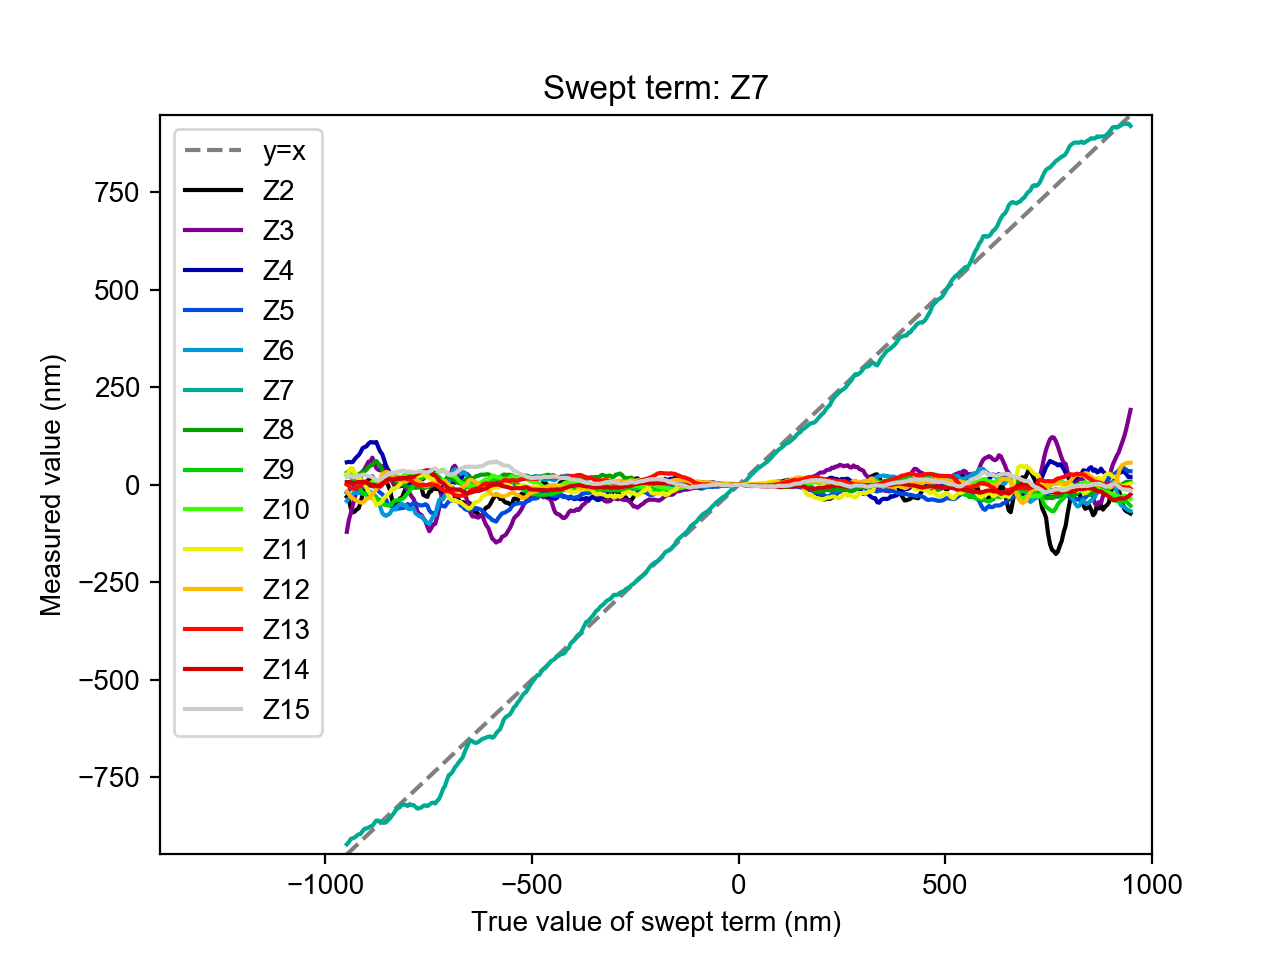

<IPython.core.display.Javascript object>


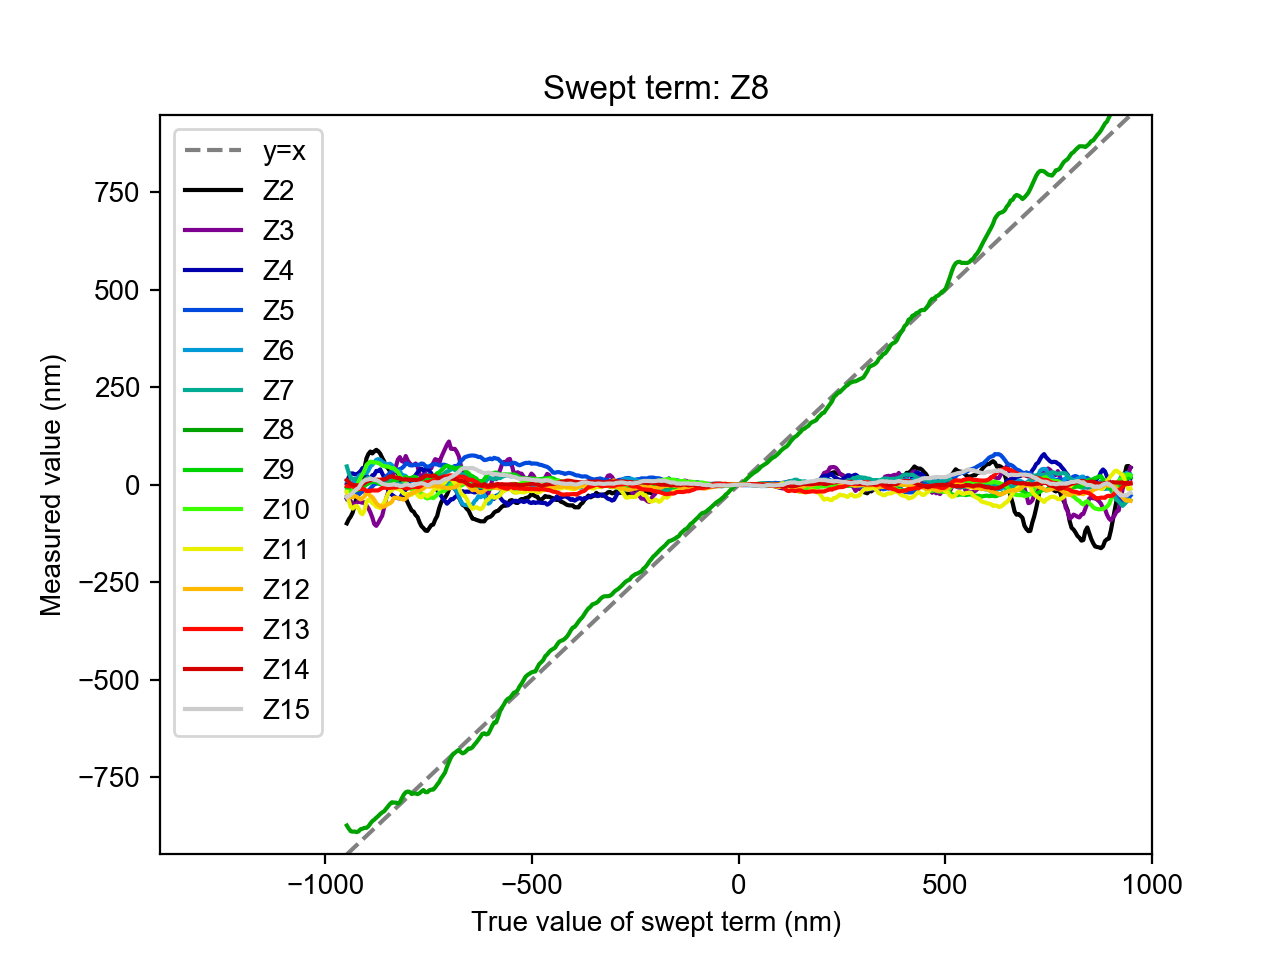

<IPython.core.display.Javascript object>


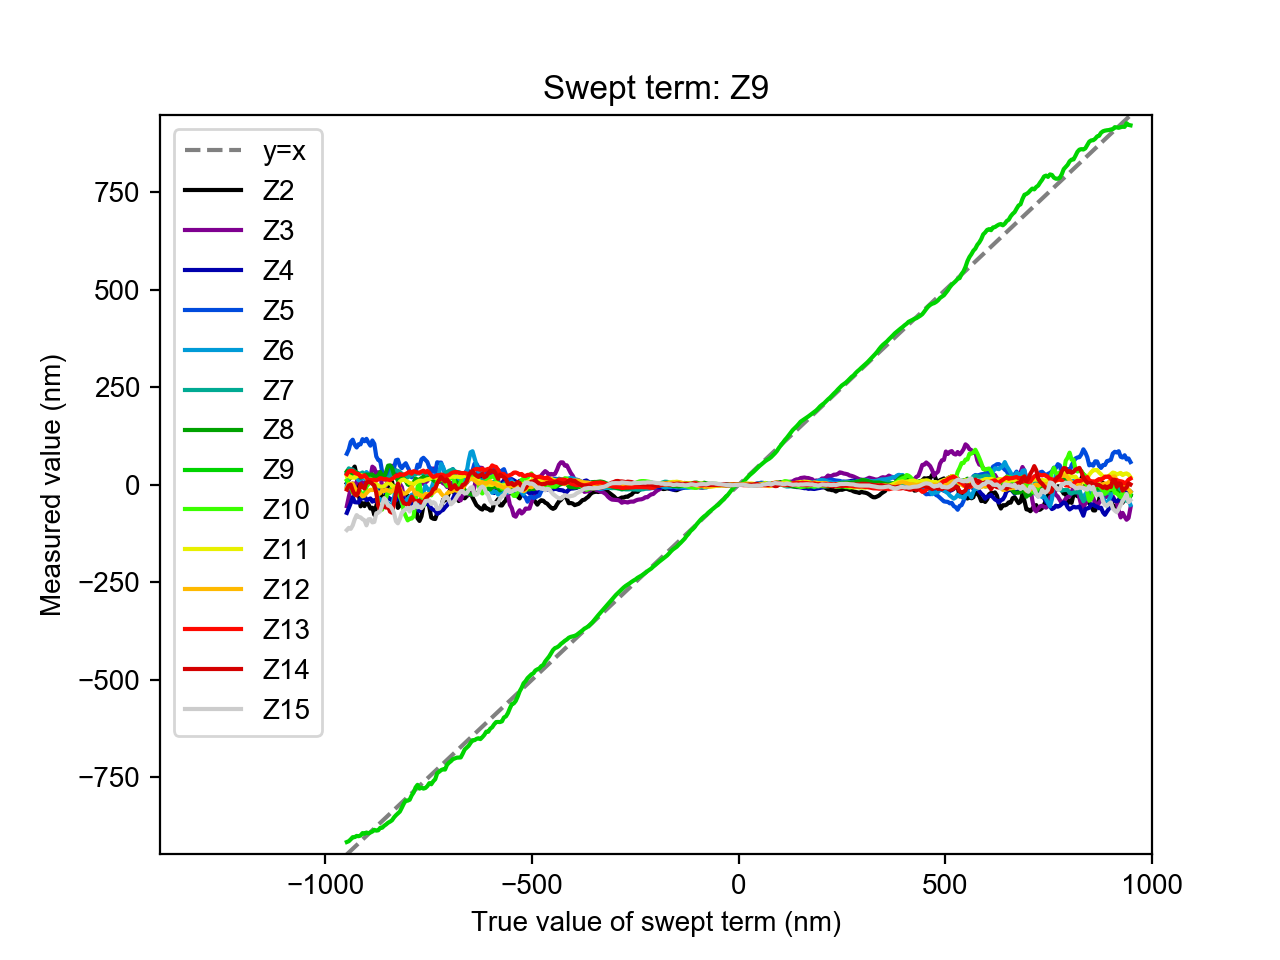

<IPython.core.display.Javascript object>


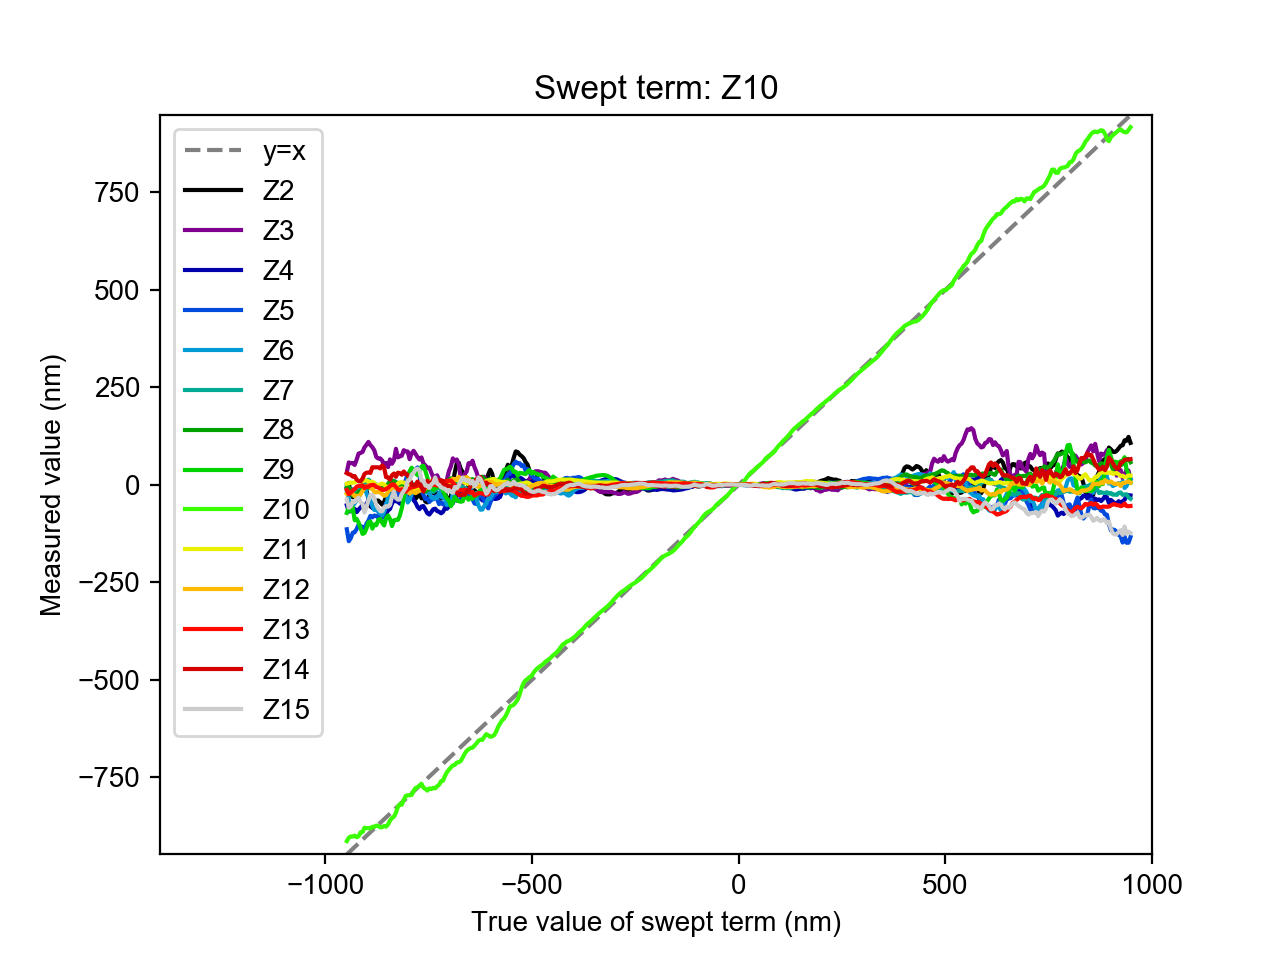

<IPython.core.display.Javascript object>


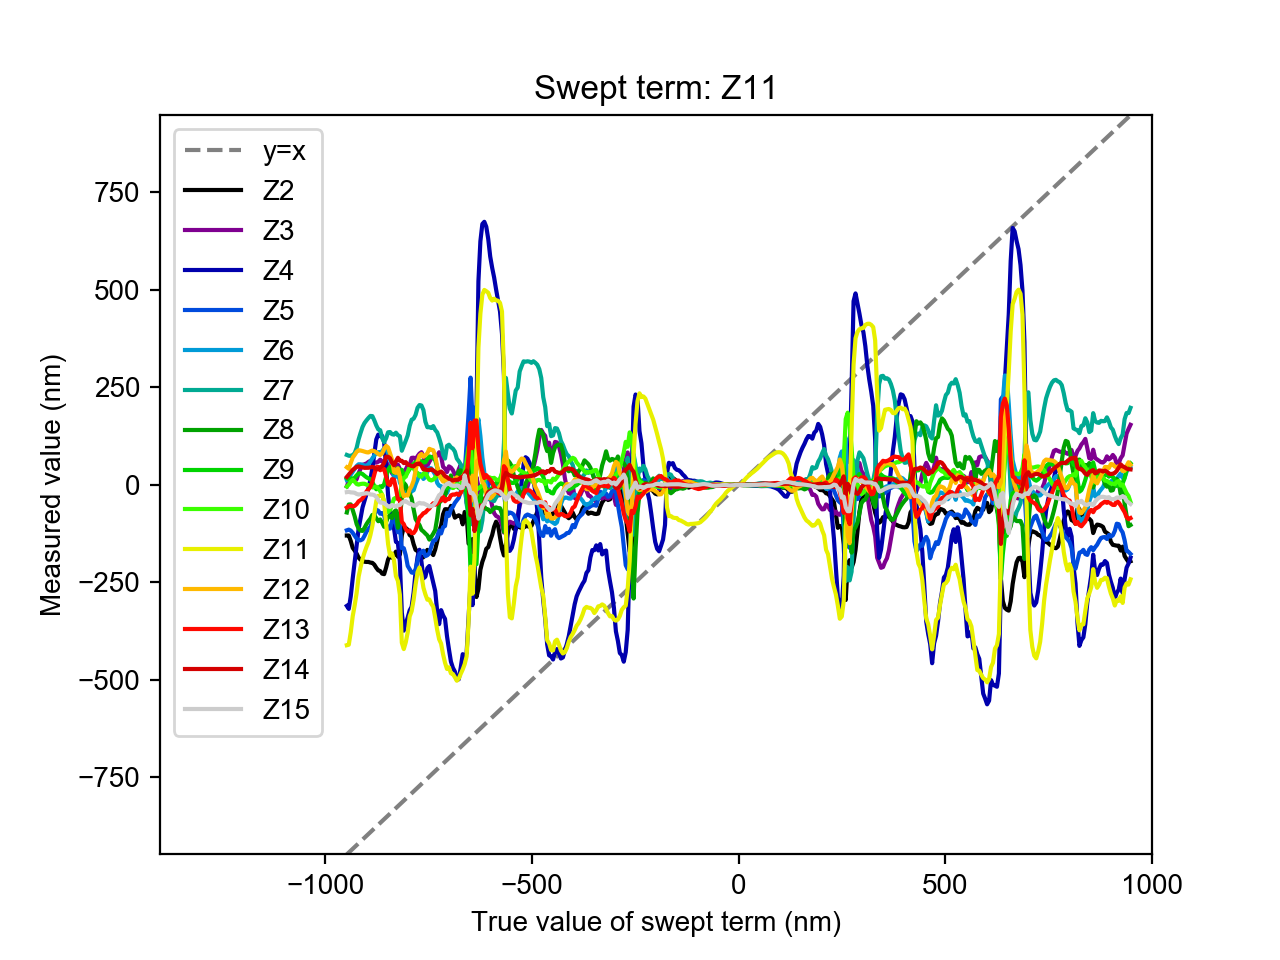

<IPython.core.display.Javascript object>


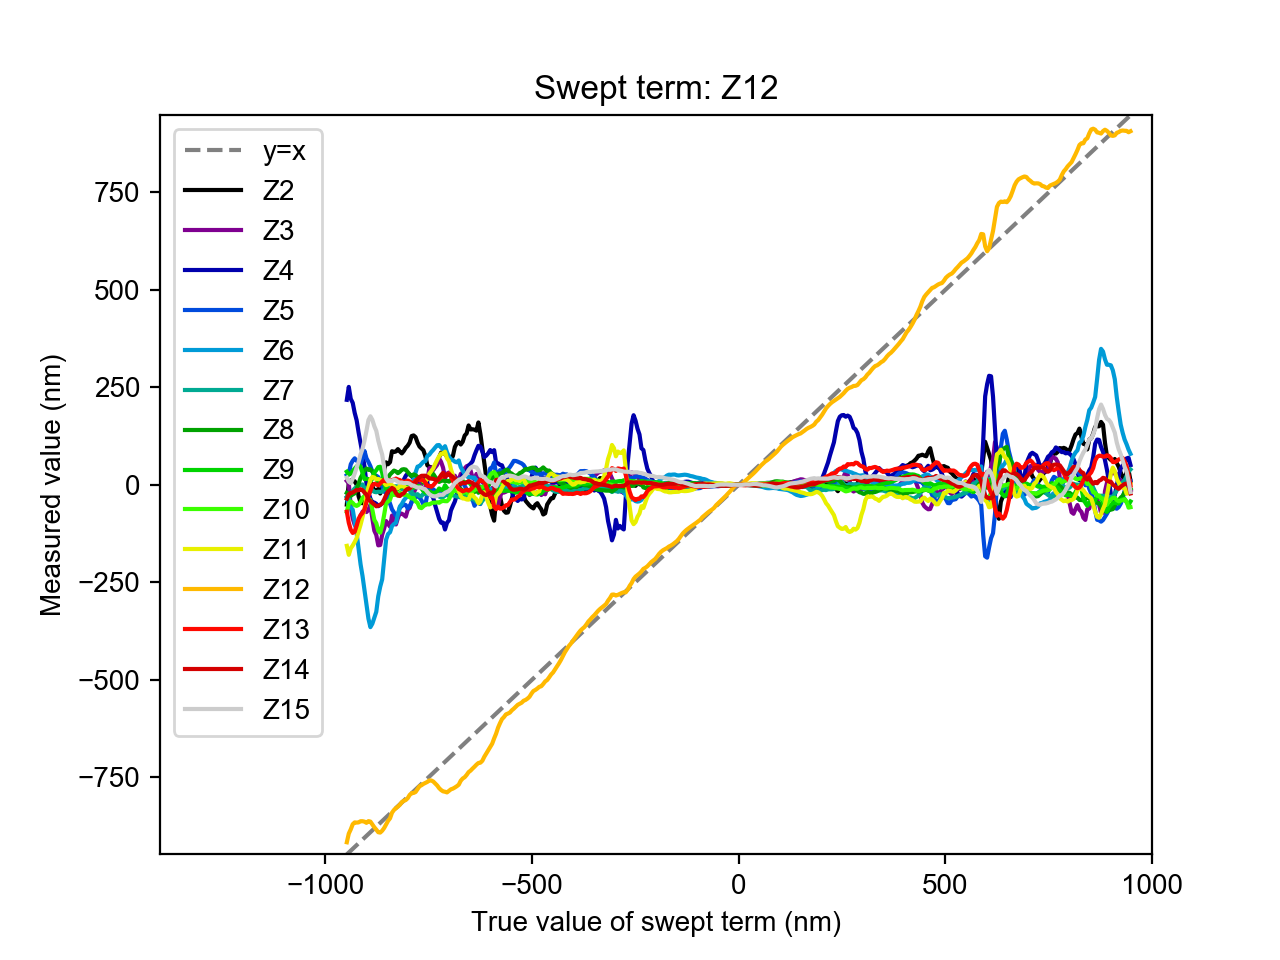

<IPython.core.display.Javascript object>


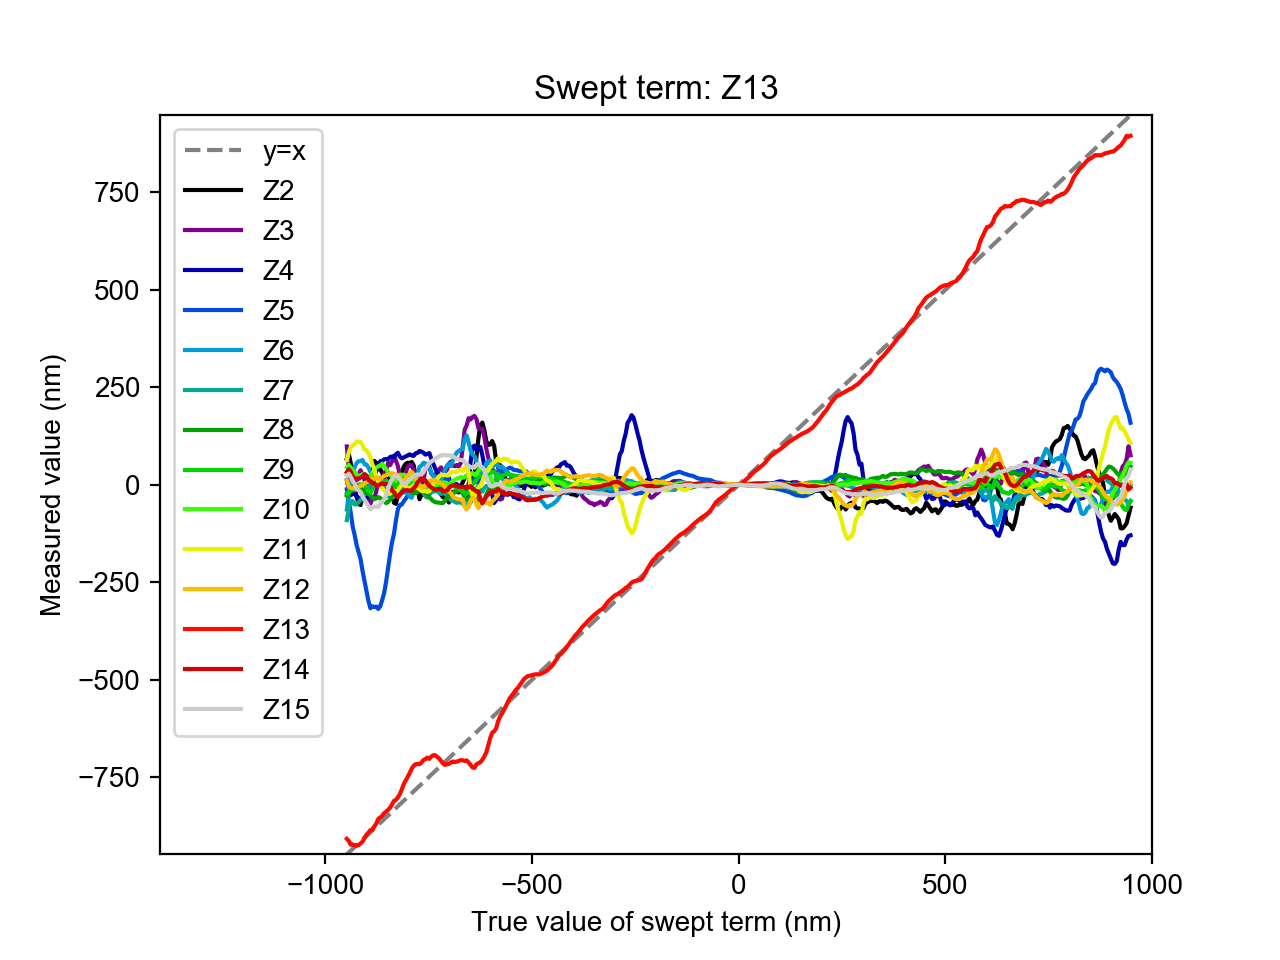

<IPython.core.display.Javascript object>


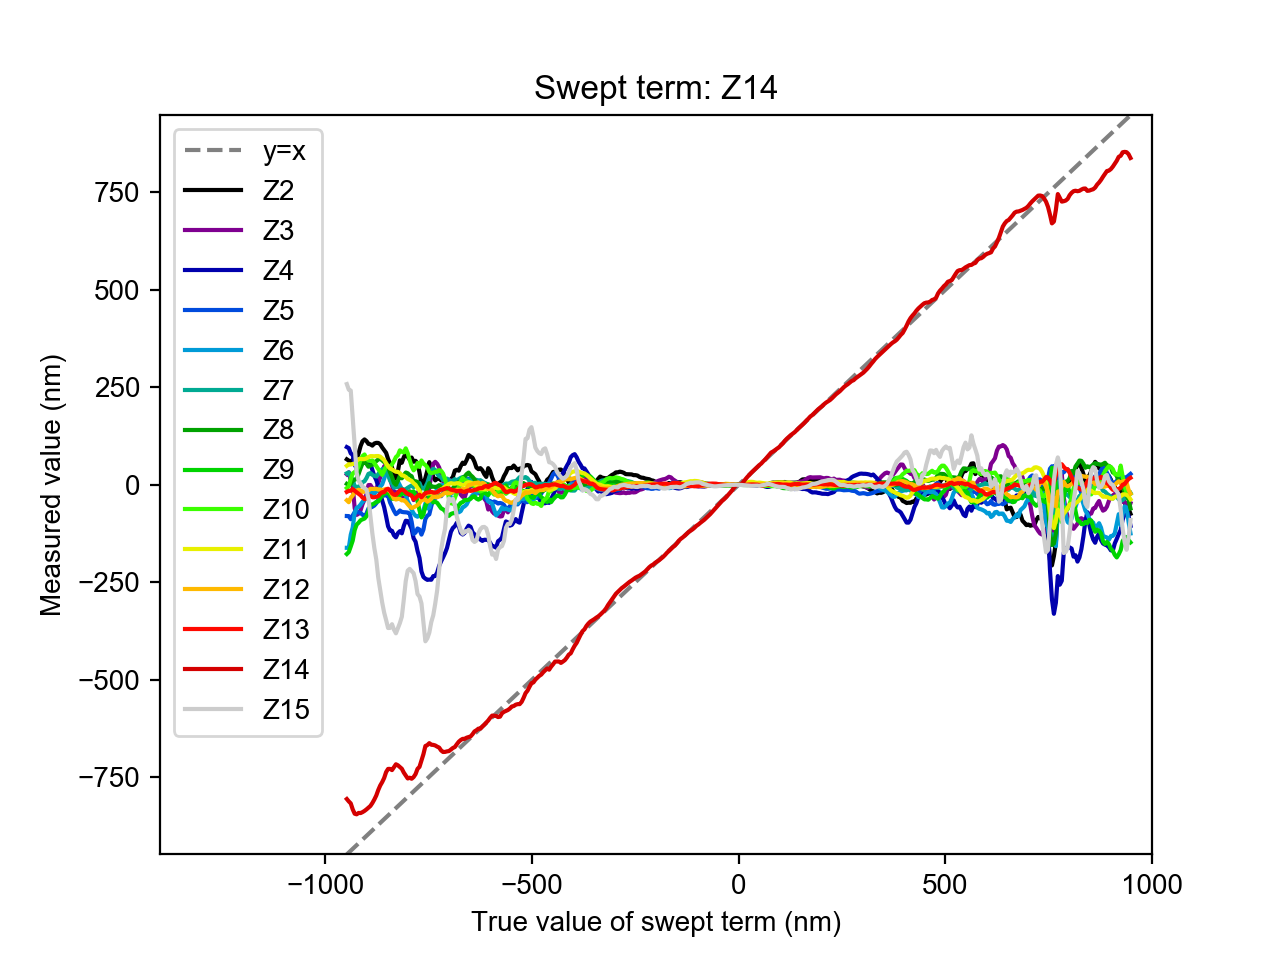

<IPython.core.display.Javascript object>


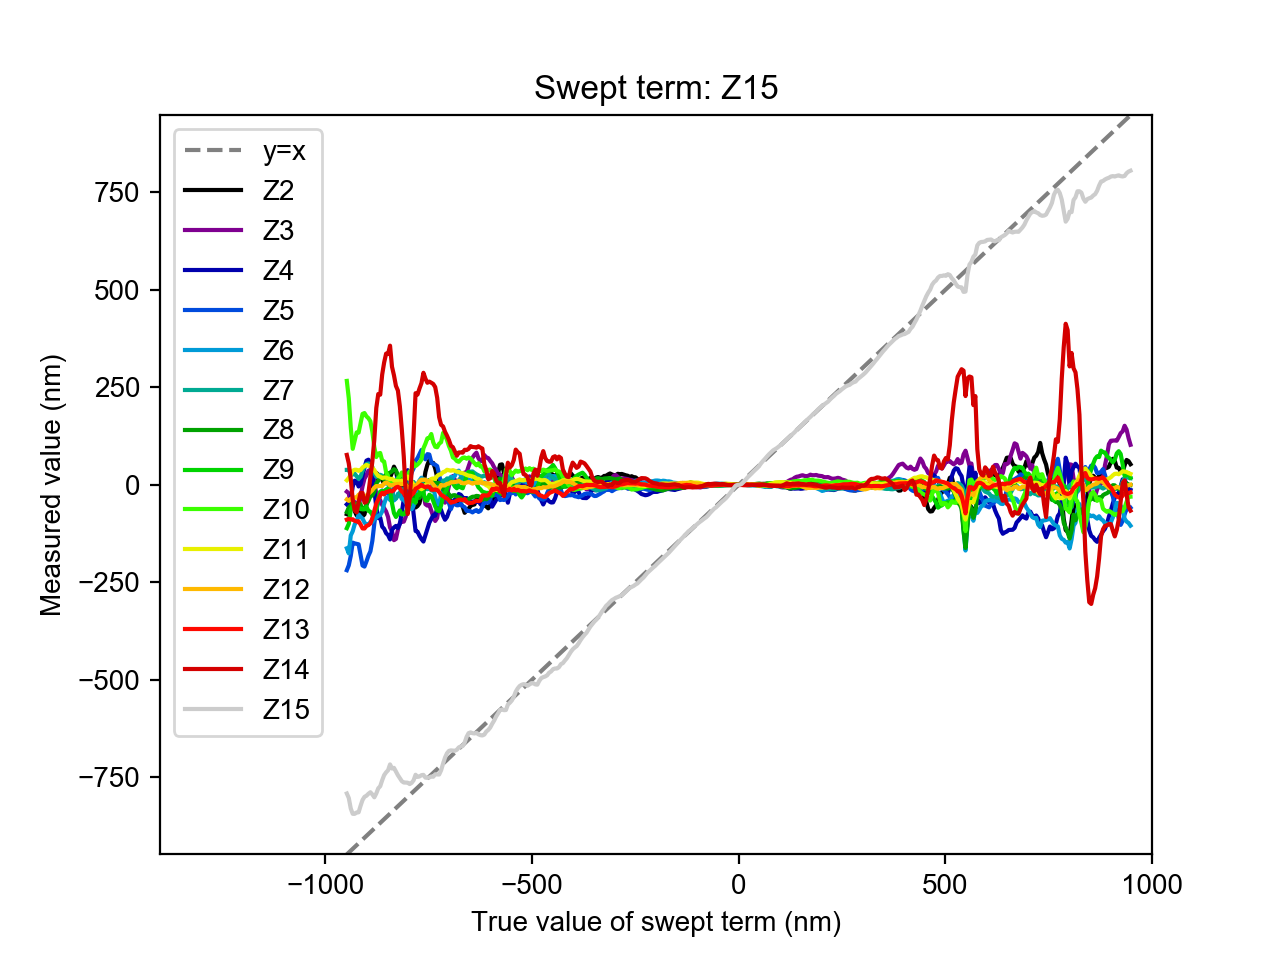

In [9]:
colormap = plt.cm.nipy_spectral
colorcycle = [colormap(c) for c in np.linspace(0, 1,M)]
labels = (['y=x']+['Z'+str(k+2) for k in range(M)])
for ii in range(M):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_prop_cycle(color=colorcycle)
    ax1.plot([-948,948],[-948,948],"--",color='grey')
    for jj in range(M):
        rec = rec948nm[ii*N:(ii+1)*N,jj]
        ax1.plot(truthVec,rec)
        #ax1.text(truthVec[-1]+5,rec[-1],str(jj+2))
        ax1.set_xlim([-1400,1000])
        ax1.set_ylim([-948,948])
    ax1.set_xlabel("True value of swept term (nm)")
    ax1.set_ylabel("Measured value (nm)")
    ax1.set_title('Swept term: Z'+str(ii+2))
    ax1.legend(labels)
    fig1.savefig('outfigs/Z'+str(ii+2)+'response.eps', format='eps')

<IPython.core.display.Javascript object>


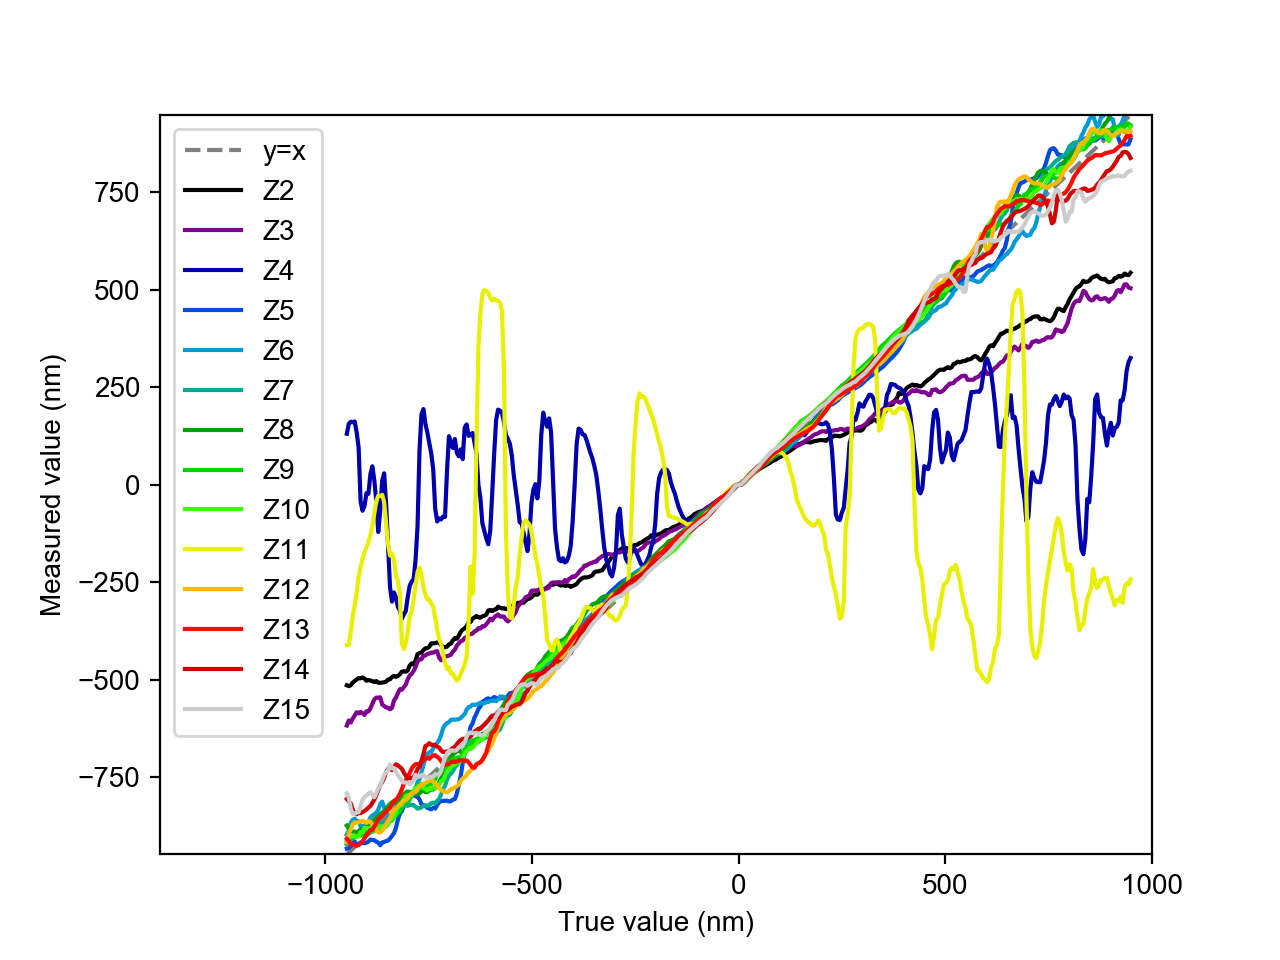

In [8]:
colormap = plt.cm.nipy_spectral
colorcycle = [colormap(c) for c in np.linspace(0, 1,M)]
labels = (['y=x']+['Z'+str(k+2) for k in range(M)])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_prop_cycle(color=colorcycle)
ax1.plot([-948,948],[-948,948],"--",color='grey')
for ii in range(M):
    rec = rec948nm[ii*N:(ii+1)*N,ii]
    ax1.plot(truthVec,rec)
    #ax1.text(truthVec[-1]+5,rec[-1],str(jj+2))
ax1.set_xlim([-1400,1000])
ax1.set_ylim([-948,948])
ax1.set_xlabel("True value (nm)")
ax1.set_ylabel("Measured value (nm)")
    #ax1.set_title('Swept term: Z'+str(ii+2))
ax1.legend(labels)
fig1.savefig('outfigs/all_responses.eps', format='eps')

# Results for -948 to 948 nm

In [4]:
K = 800

with h5py.File('individual_response_948nm.mat', 'r') as f:
    print(f.keys())
    truth948nm = f["test_gd"]
    rec948nm = np.array(f['test_rec_noiseless'])
    print(truth948nm.shape)
    truthVec948 = truth948nm[:K,0] 

<KeysViewHDF5 ['test_gd', 'test_rec_noiseless']>
(11200, 14)


<IPython.core.display.Javascript object>


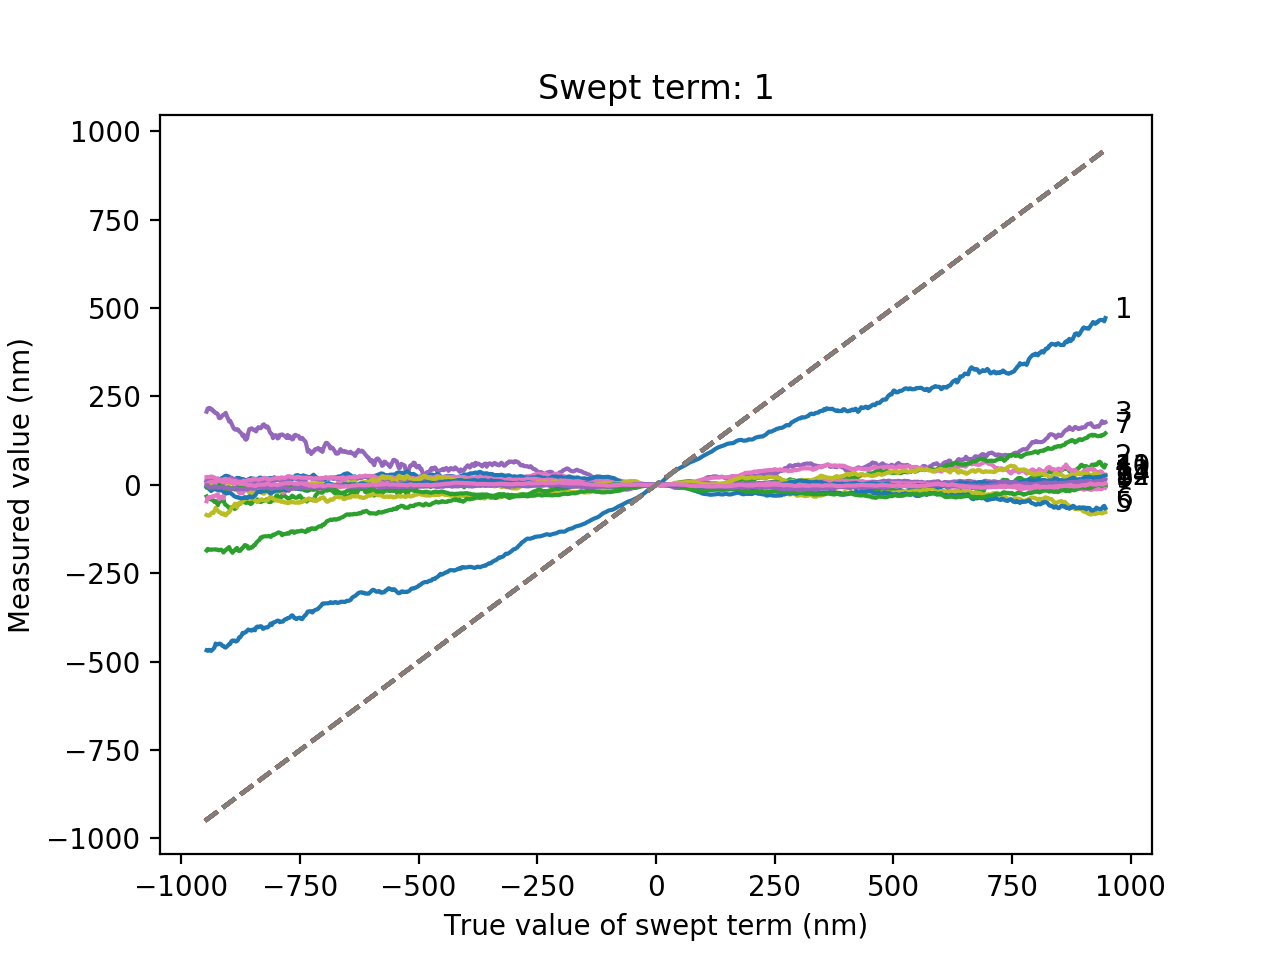

<IPython.core.display.Javascript object>


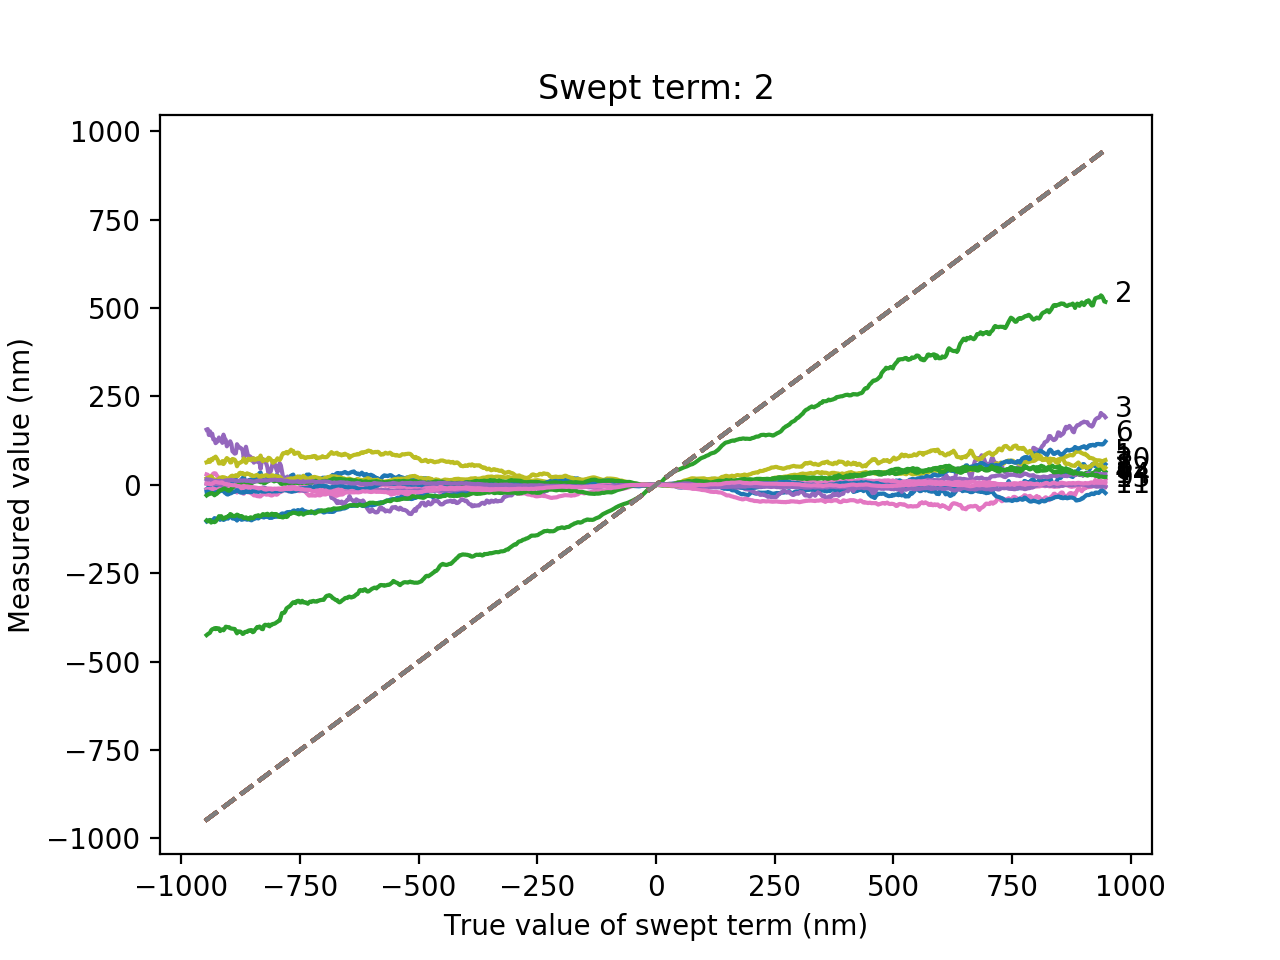

<IPython.core.display.Javascript object>


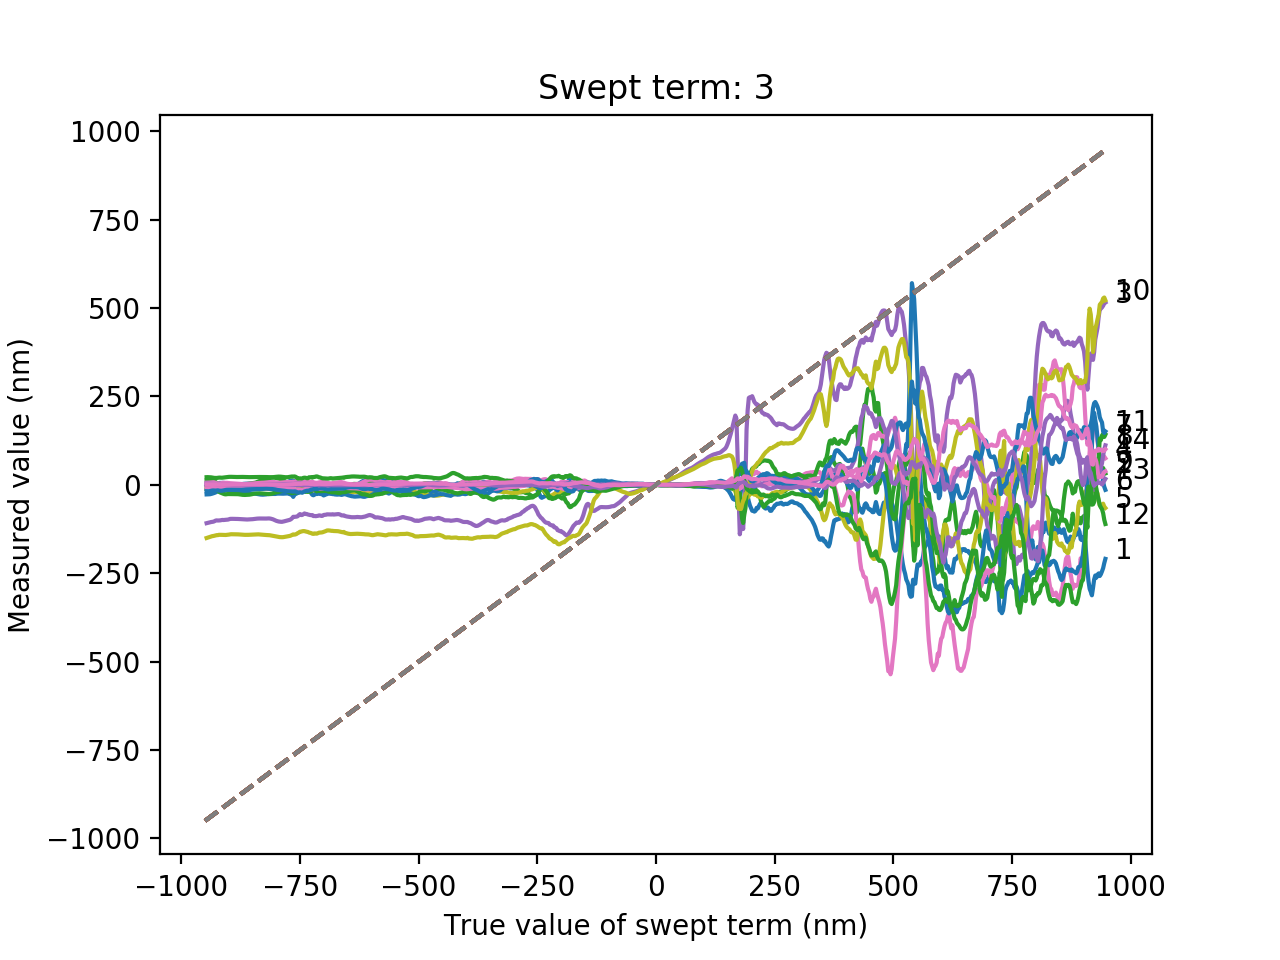

<IPython.core.display.Javascript object>


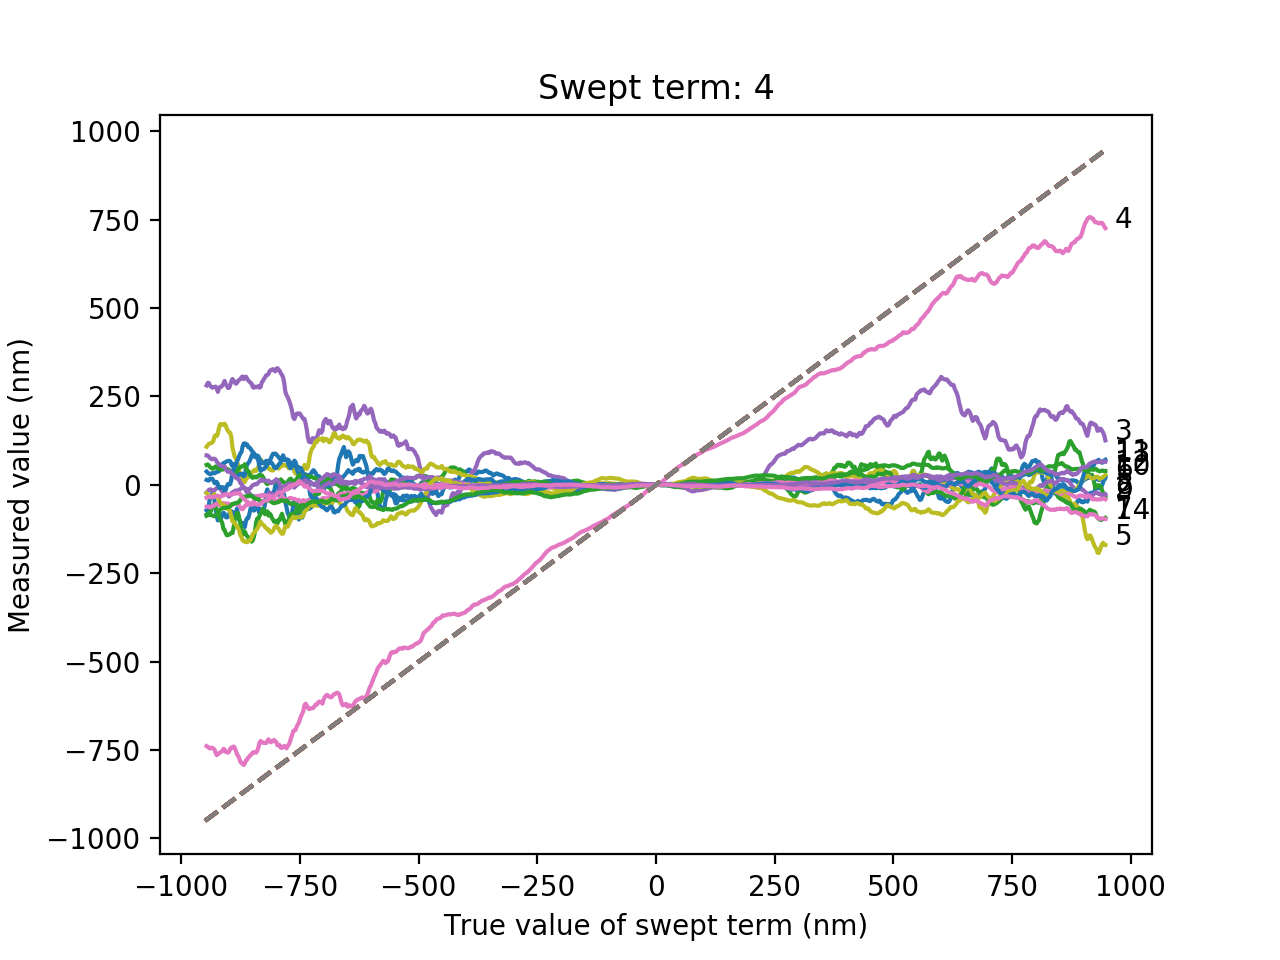

<IPython.core.display.Javascript object>


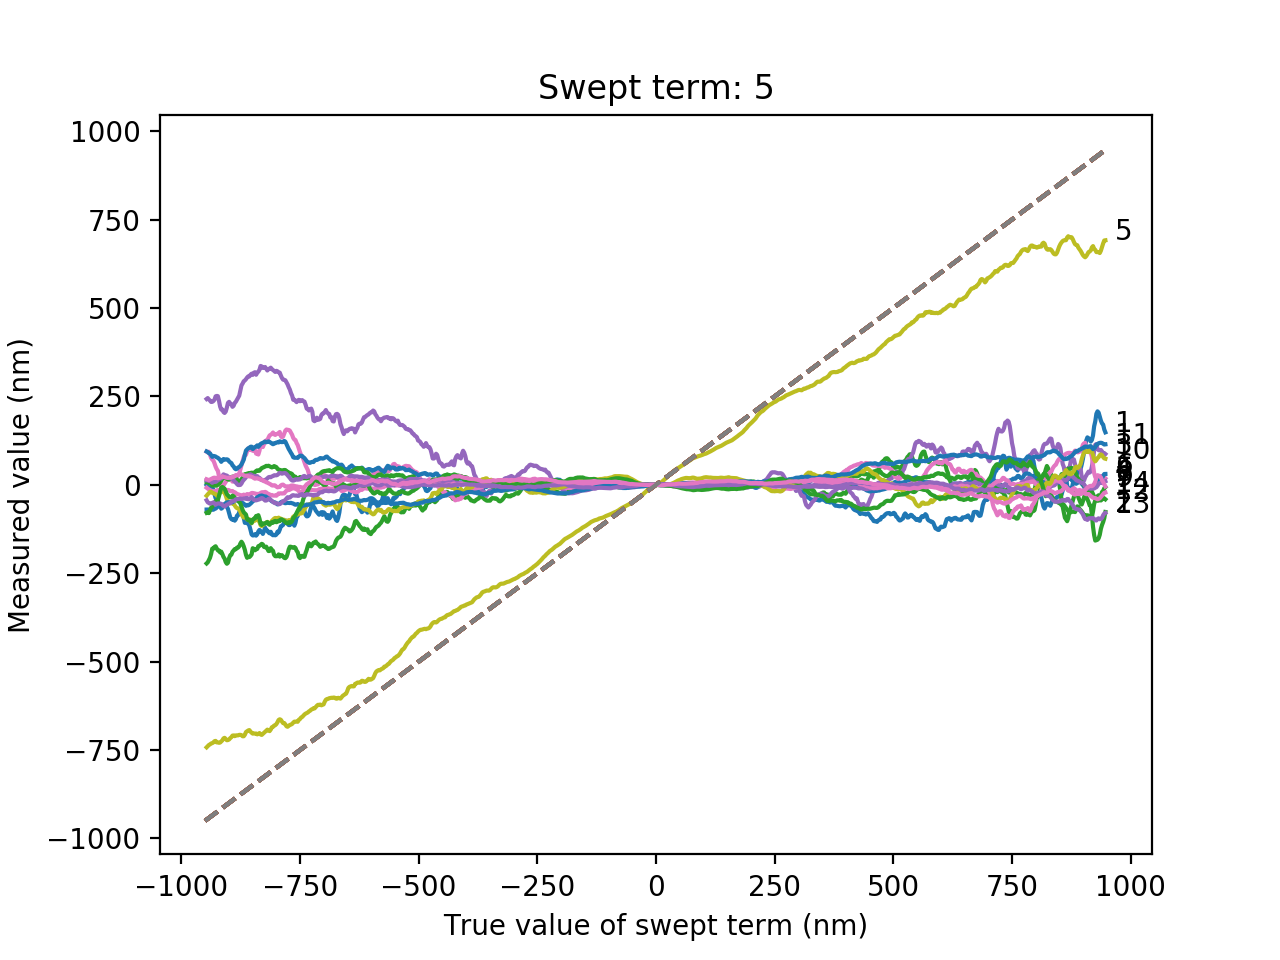

<IPython.core.display.Javascript object>


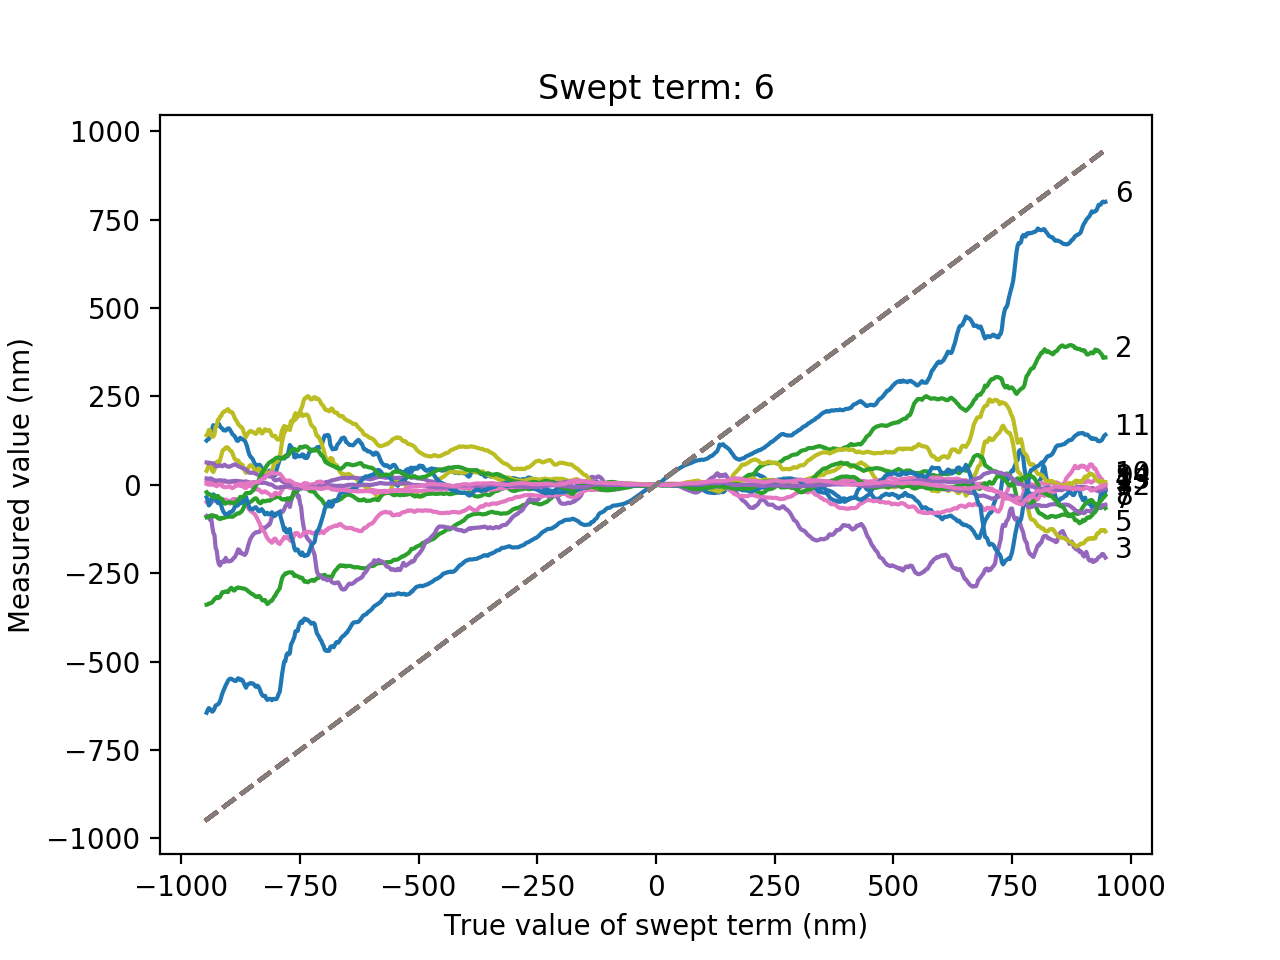

/Users/gregoryallan/repos/coronagraph-NN-data-gen/nn-gen-venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


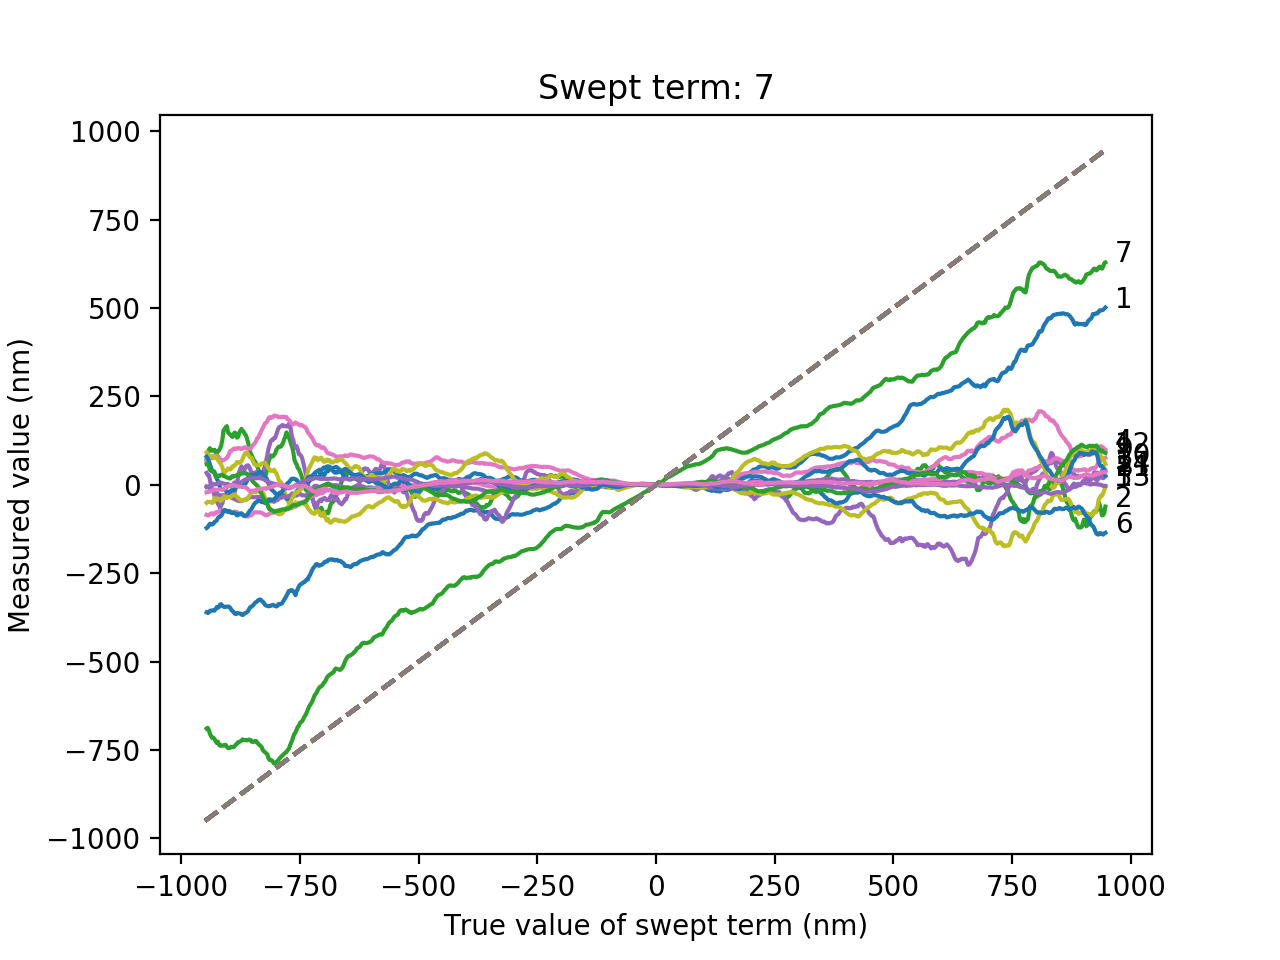

<IPython.core.display.Javascript object>


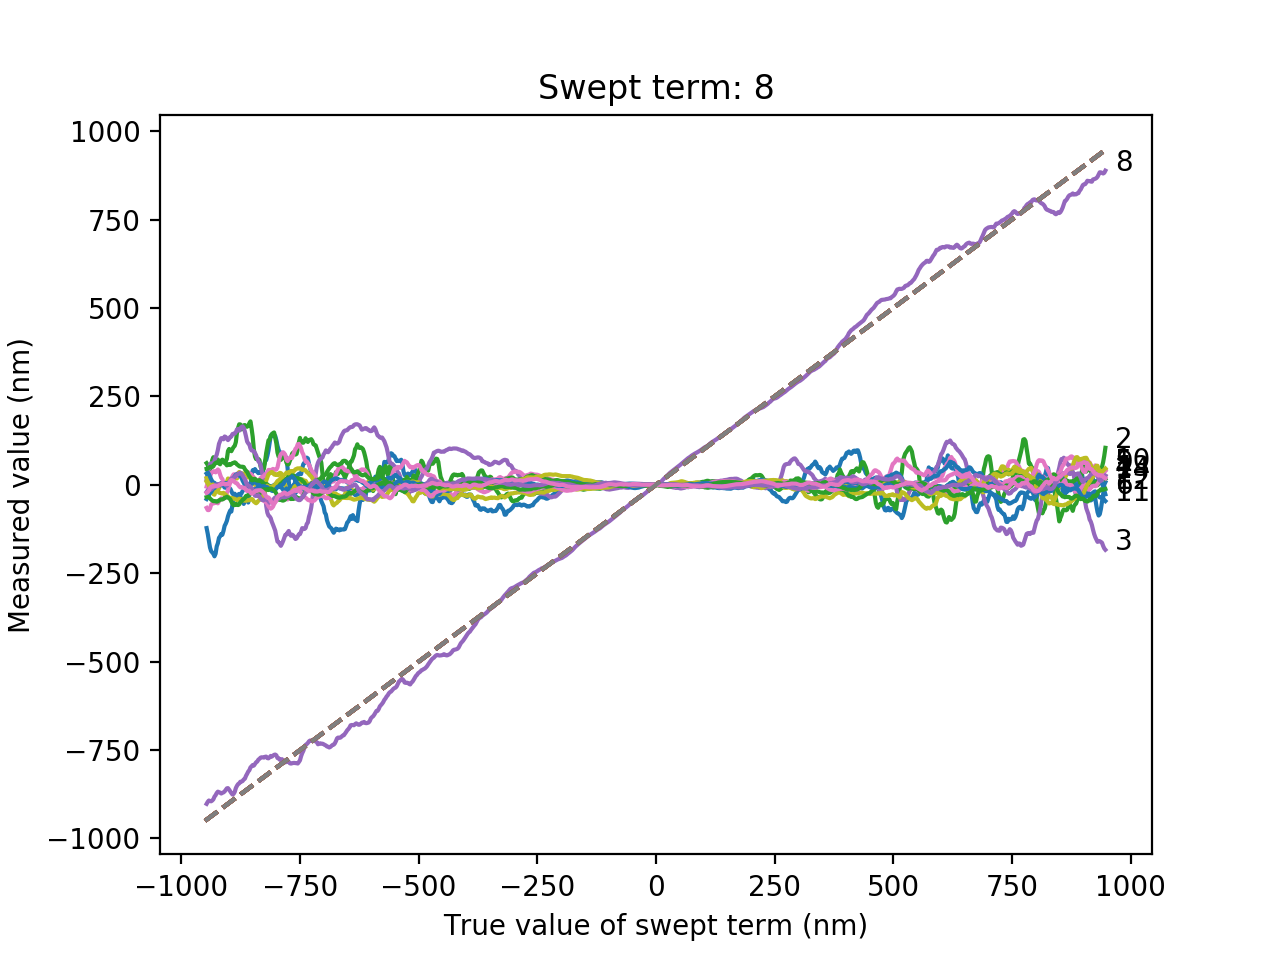

<IPython.core.display.Javascript object>


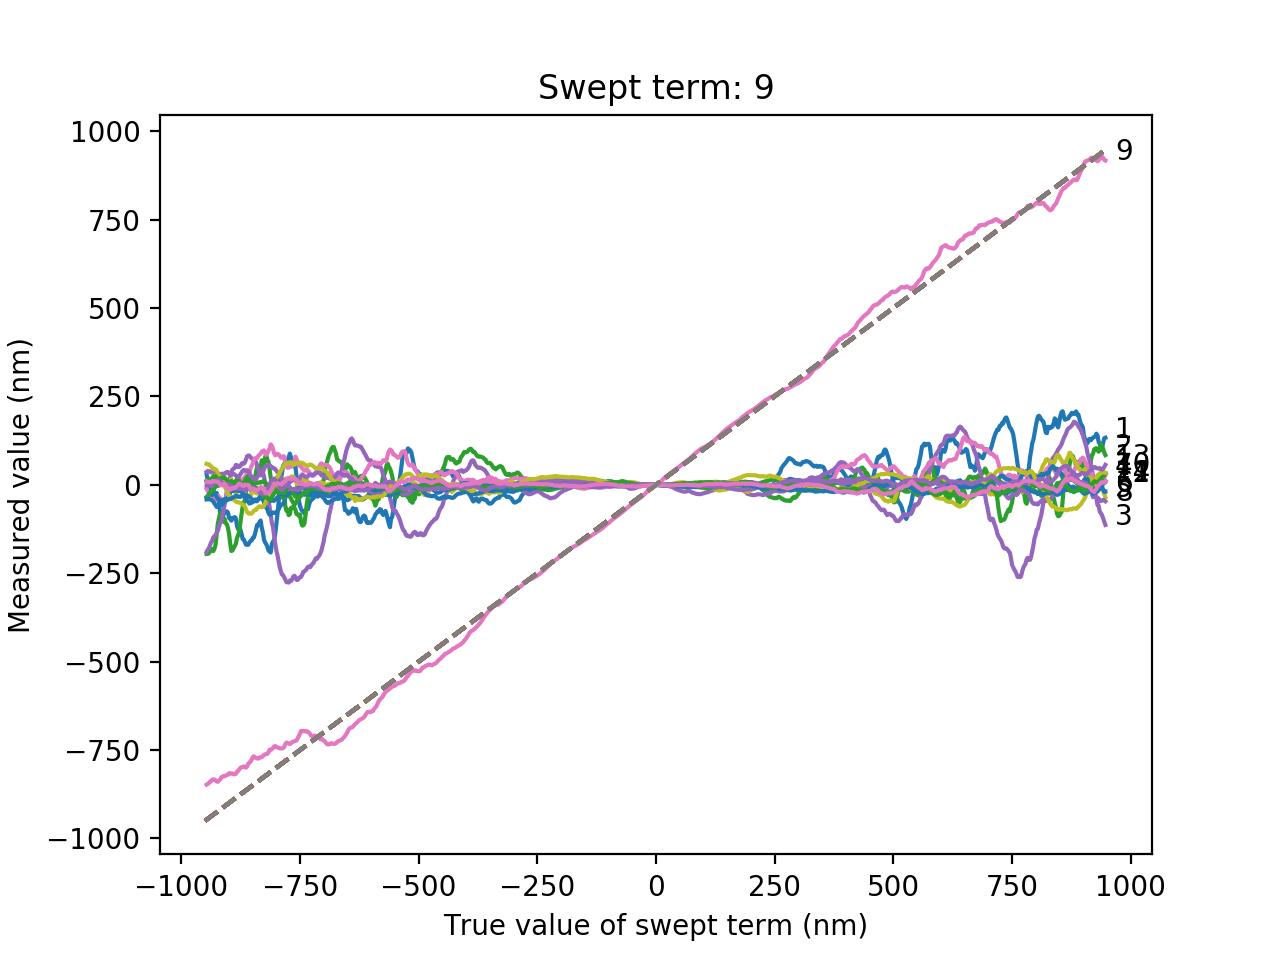

<IPython.core.display.Javascript object>


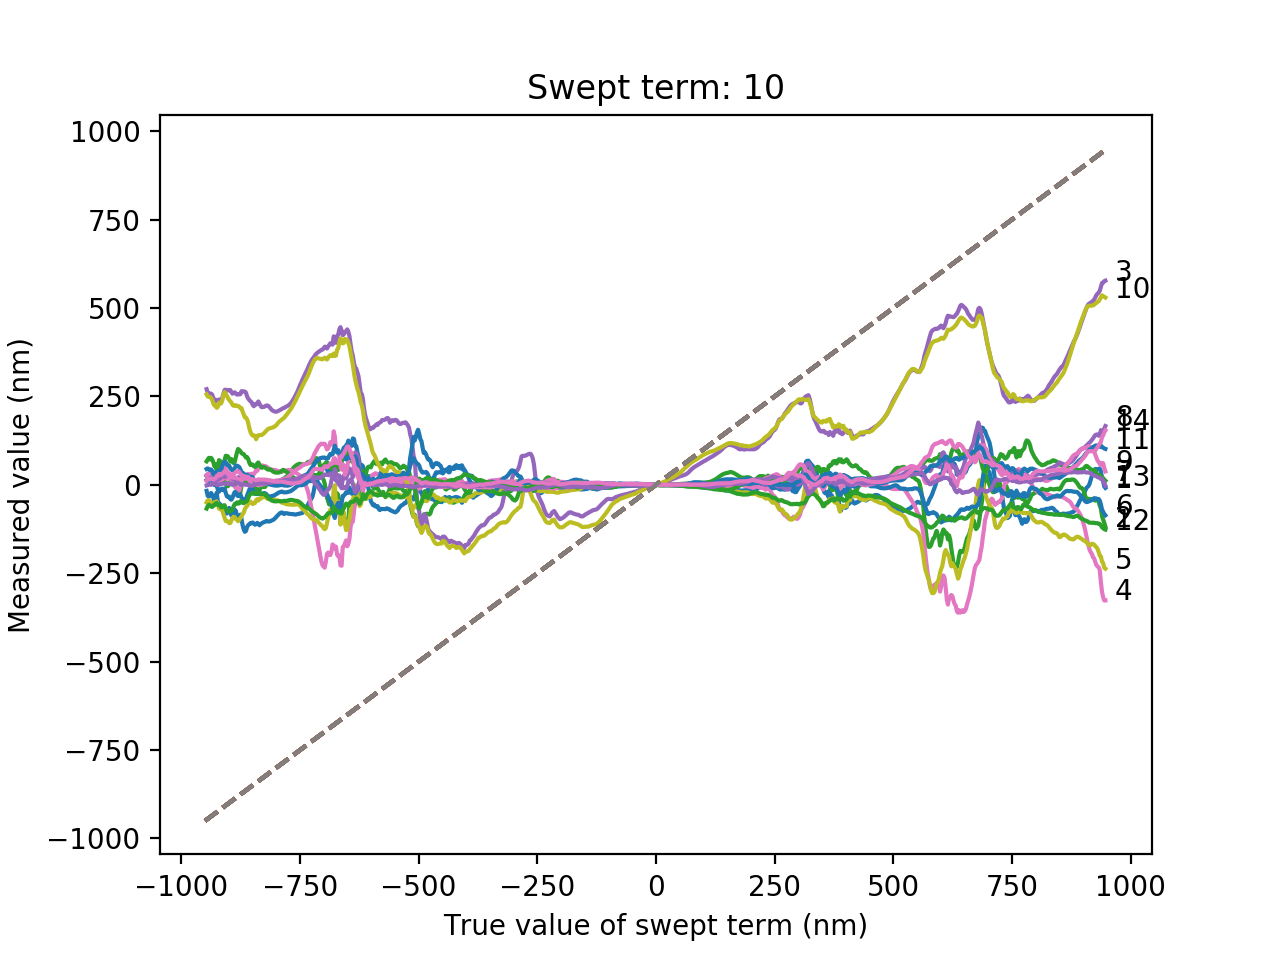

<IPython.core.display.Javascript object>


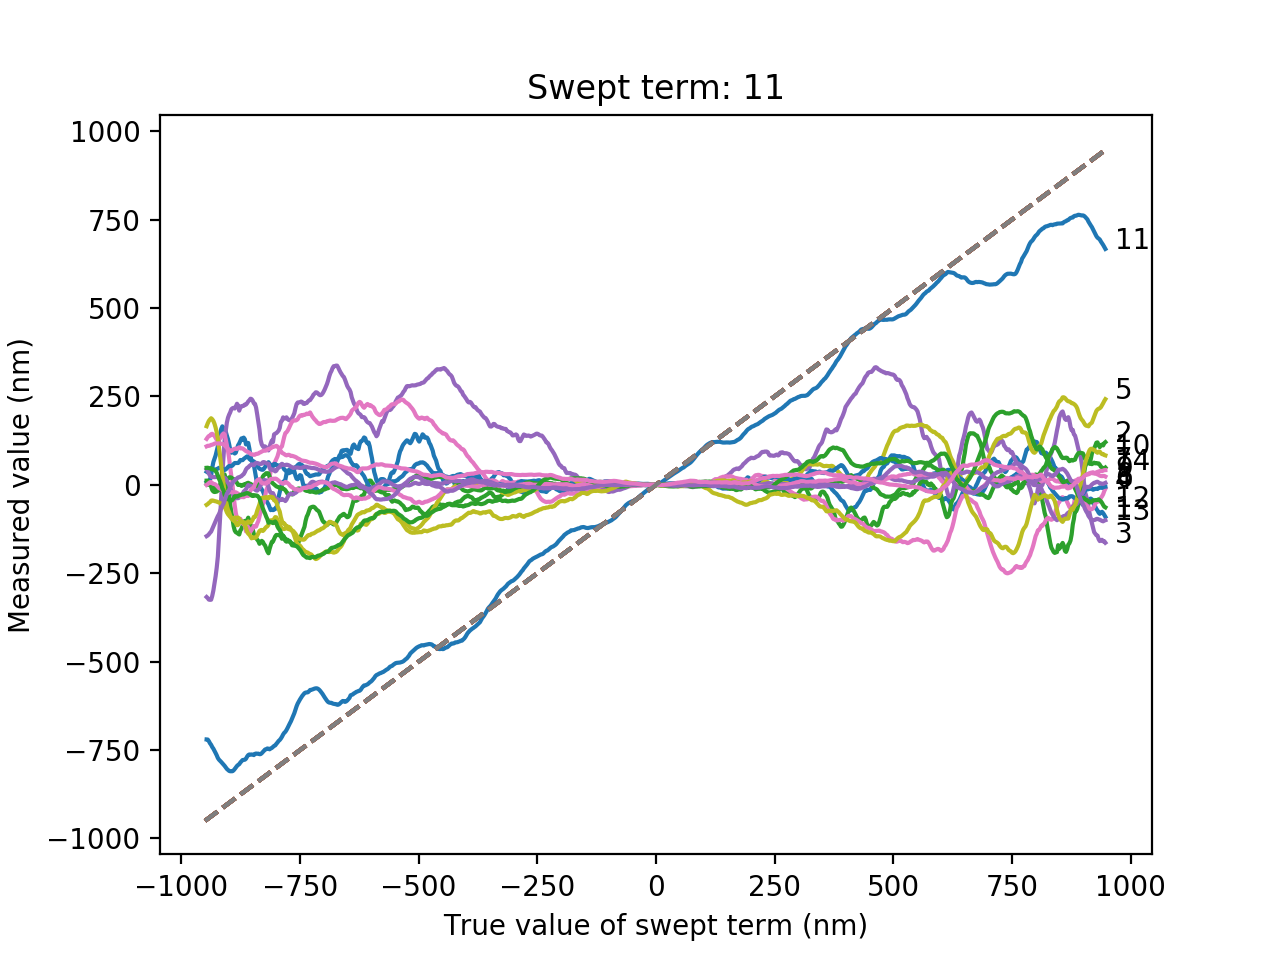

<IPython.core.display.Javascript object>


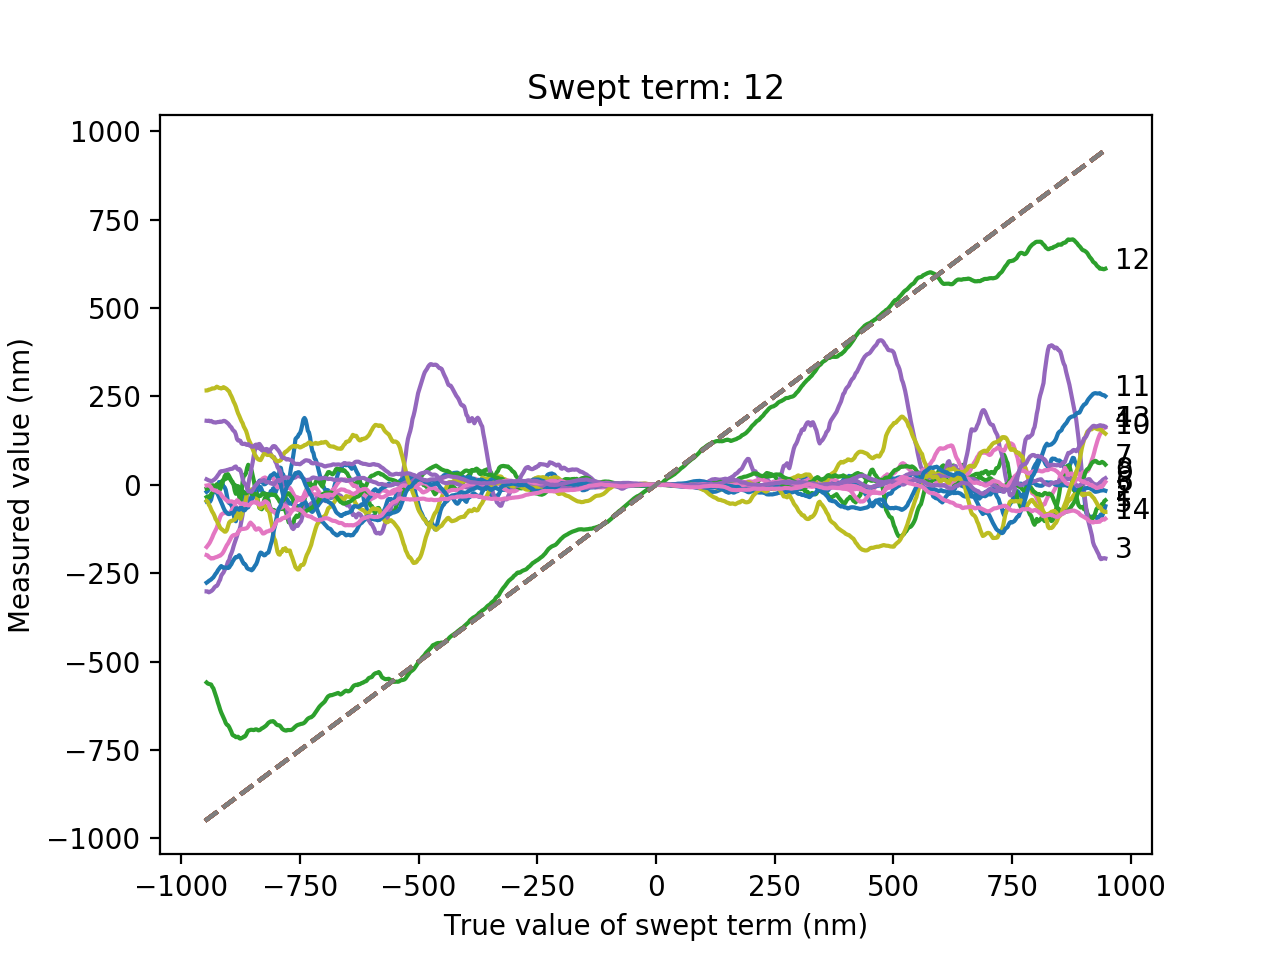

<IPython.core.display.Javascript object>


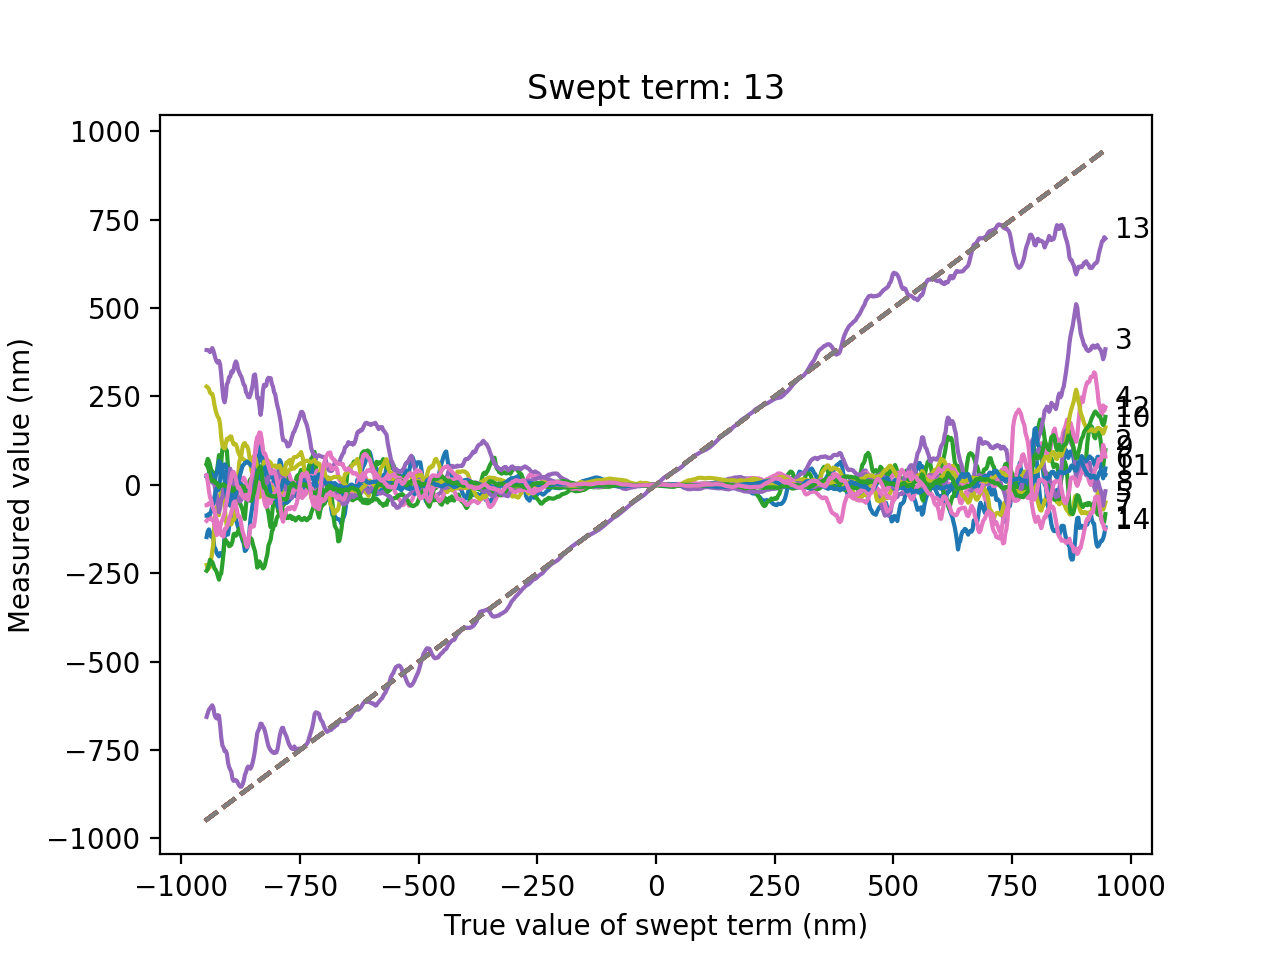

<IPython.core.display.Javascript object>


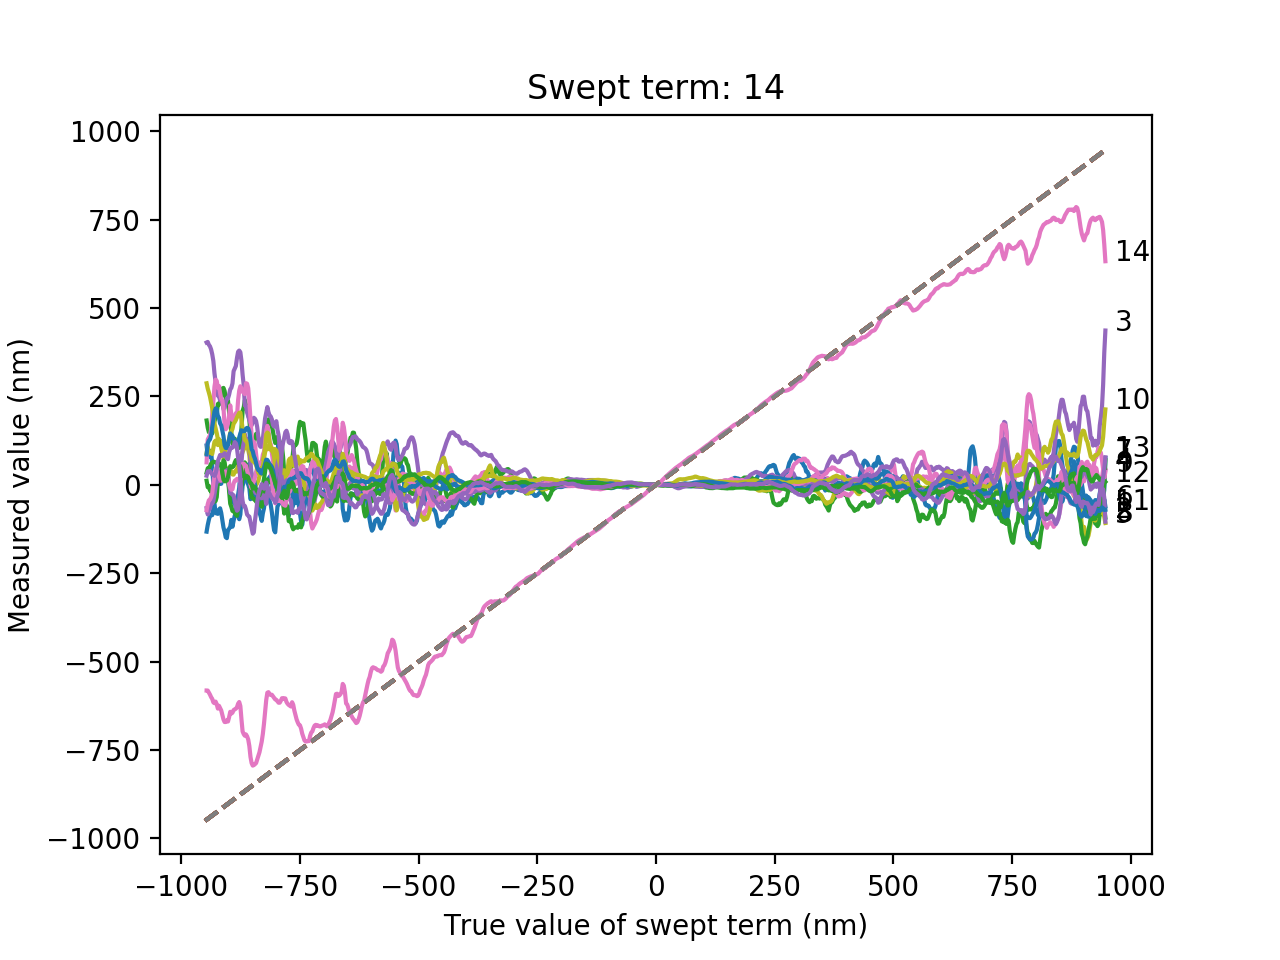

In [5]:
colormap = plt.cm.nipy_spectral
colorcycle = [colormap(c) for c in np.linspace(0, 1,M)]
for ii in range(M):
    plt.figure()
    for jj in range(M):
        rec = rec948nm[ii*K:(ii+1)*K,jj]
        plt.plot(truthVec948*lam,rec*lam)
        plt.plot([-950,950],[-950,950],"--")
        plt.text(truthVec948[-1]*lam+20,rec[-1]*lam,str(jj+1))
    plt.xlabel("True value of swept term (nm)")
    plt.ylabel("Measured value (nm)")
    plt.title('Swept term: '+str(ii+1))